In [5]:
import random

from pprint import pprint
from solution import State, run_simulated_annealing
import re
import vrplib
import os
import multiprocessing as mp
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from pathlib import Path
from time import perf_counter

best_loss = 1140.5687307937096 | optimal_value = 1073.0


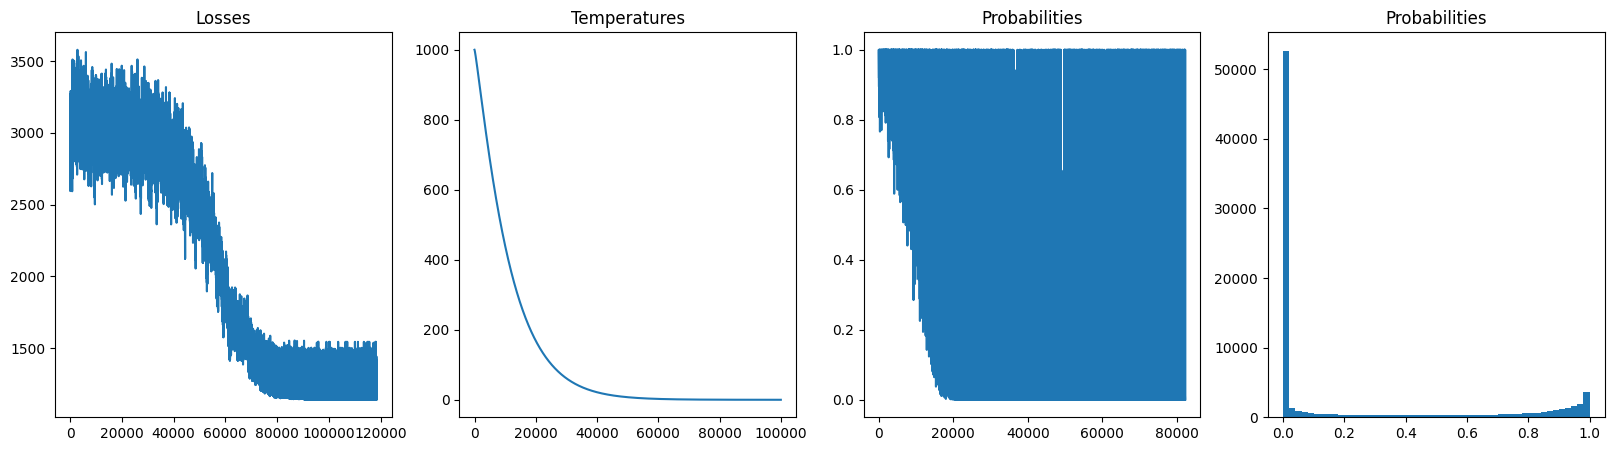

In [2]:
losses = []
targets = []
# for path in filter(lambda p: p.endswith(".vrp"), os.listdir("./Vrp-Set-A/")[1:]):

random.seed(911)
instance = vrplib.read_instance(f"./Vrp-Set-A/A-n55-k9.vrp")
optimal_value = float(re.findall(r"Optimal value: \d+", instance["comment"])[0].split()[-1])

n_nodes, n_cars = map(int, re.findall(r"\d+", instance["name"]))

best_state, best_loss, state_losses, temperatures, probabilities = run_simulated_annealing(
    n_cars, 
    n_nodes, 
    instance["demand"], 
    instance["capacity"],
    instance["edge_weight"],
    # prob_multiplier=50,
    alpha=0.00001,
    initial_temp=1000  
)

losses.append(best_loss)
targets.append(optimal_value)

print(f"{best_loss = } | {optimal_value = }")

from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].set_title("Losses")
axes[0].plot(state_losses)

axes[1].set_title("Temperatures")
axes[1].plot(temperatures)

axes[2].set_title("Probabilities")
axes[2].plot(probabilities)

axes[3].set_title("Probabilities")
axes[3].hist(probabilities, bins=50)
plt.show()

In [19]:
def run_single_run(args):
    path: Path = args[0]
    if len(args) > 1:
        seed = args[1]
    else:
        seed = 911
    losses = []
    targets = []

    random.seed(seed)
    instance = vrplib.read_instance(f"{path}")

    if "Optimal value" in instance["comment"]:
        optimal_value = float(re.findall(r"Optimal value: \d+", instance["comment"])[0].split()[-1])
    elif "Best Value" in instance["comment"]:
        optimal_value = float(re.findall(r"Best Value: \d+", instance["comment"])[0].split()[-1])

    n_nodes, n_cars = map(int, re.findall(r"\d+", instance["name"]))

    start_time = perf_counter()
    best_state, best_loss, state_losses, temperatures, probabilities = run_simulated_annealing(
        n_cars, 
        n_nodes, 
        instance["demand"], 
        instance["capacity"],
        instance["edge_weight"],
        # prob_multiplier=50,
        alpha=0.00001,
        initial_temp=1000  
    )
    end_time = perf_counter()

    with open(f"timeit.csv", "at+", encoding="UTF-8") as f:
        f.write(f"{path.parts[-2]},{n_nodes},{n_cars},{end_time - start_time},{abs(best_loss - optimal_value)/optimal_value}\n")

    losses.append(best_loss)
    targets.append(optimal_value)

    return best_loss, optimal_value, seed


In [20]:
def compute_quality(base_folder, exceptions: list = []):
    deviations = []

    for path in filter(
        lambda el: el.endswith('vrp') and el not in exceptions, 
        os.listdir(base_folder)
    ):
        print(f"\n{path}")
        best_loss, optimal_value, _ = run_single_run((Path(base_folder, path),))

        print(f"{best_loss = } | {optimal_value = }")

        deviation = abs(best_loss - optimal_value)

        deviations.append(deviation / optimal_value)


    print(deviations)
    print(f"{np.max(deviations) = }")
    print(f"{np.mean(deviations) = }")
    print(f"{np.min(deviations) = }")


def compute_quality_with_seed_tuning(base_folder, exceptions: list = []):
    deviations = []

    for path in filter(
        lambda el: el.endswith('vrp') and el not in exceptions, 
        os.listdir(base_folder)
    ):
        print(f"\n{path}")

        results = run_seed_optimizaiton(Path(base_folder, path))
        best_result = min(results, key=lambda el: abs(el[0] - el[1]) / el[1])
        
        print(f"best_loss = {best_result[0]} | optimal_value = {best_result[1]}")

        deviation = abs(best_result[0] - best_result[1])

        deviations.append(deviation / best_result[1])

    print(deviations)
    print(f"{np.max(deviations) = }")
    print(f"{np.mean(deviations) = }")
    print(f"{np.min(deviations) = }")




def run_seed_optimizaiton(path: str, n_processes: int = 20):
    p = mp.Pool(n_processes)
    seeds = [(path, seed) for seed in range(100, 3101, 10)]
    results = p.map(run_single_run, seeds)

    p.close()
    p.join()

    return results

    

In [4]:
compute_quality_with_seed_tuning("Vrp-Set-M")


M-n200-k17.vrp


best_loss = 1620.5447444566348 | optimal_value = 1373.0

M-n121-k7.vrp


best_loss = 1243.5438344341917 | optimal_value = 1034.0

M-n101-k10.vrp


best_loss = 875.3607919628115 | optimal_value = 820.0

M-n151-k12.vrp


best_loss = 1178.4823085373275 | optimal_value = 1053.0

M-n200-k16.vrp
Unable to split nodes by default. Retrying...

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...Unable to split nodes by default. Retrying...

  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...

  0%|          | 0/100000 [00:00<?, ?it/s]

  1%|          | 852/100000 [00:00<00:59, 1665.40it/s]s]

Unable to split nodes by default. Retrying...


  1%|          | 774/100000 [00:00<00:48, 2055.20it/s]s]

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


  0%|          | 132/100000 [00:00<01:15, 1318.42it/s]  

Unable to split nodes by default. Retrying...

  1%|          | 1172/100000 [00:00<01:02, 1584.43it/s]

  1%|▏         | 1264/100000 [00:00<00:57, 1709.00it/s]]

Unable to split nodes by default. Retrying...

100%|█████████▉| 99546/100000 [01:02<00:00, 1553.31it/s]


Unable to split nodes by default. Retrying...


  2%|▏         | 1698/100000 [00:00<00:57, 1708.40it/s]]

Unable to split nodes by default. Retrying...


  3%|▎         | 3284/100000 [00:02<00:57, 1671.95it/s] 

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


 95%|█████████▌| 95175/100000 [01:00<00:02, 1766.72it/s]

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


 99%|█████████▉| 99398/100000 [01:03<00:00, 2023.39it/s]

Unable to split nodes by default. Retrying...


  4%|▎         | 3714/100000 [00:02<01:03, 1518.35it/s] 

Unable to split nodes by default. Retrying...


 93%|█████████▎| 93460/100000 [00:58<00:04, 1475.92it/s]

Unable to split nodes by default. Retrying...

 93%|█████████▎| 92872/100000 [00:59<00:04, 1653.12it/s]

 99%|█████████▊| 98616/100000 [01:02<00:00, 1925.01it/s]

Unable to split nodes by default. Retrying...


  2%|▏         | 2323/100000 [00:01<01:08, 1420.02it/s] 

Unable to split nodes by default. Retrying...


  2%|▏         | 2172/100000 [00:01<00:58, 1659.97it/s]

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


 97%|█████████▋| 97079/100000 [01:01<00:01, 1598.92it/s]

Unable to split nodes by default. Retrying...


 95%|█████████▍| 94543/100000 [00:59<00:02, 1831.04it/s]

Unable to split nodes by default. Retrying...


  7%|▋         | 7160/100000 [00:04<01:03, 1453.56it/s]]

Unable to split nodes by default. Retrying...


  5%|▍         | 4525/100000 [00:02<00:43, 2215.61it/s] 

Unable to split nodes by default. Retrying...


  1%|          | 1089/100000 [00:00<01:15, 1307.23it/s]]

Unable to split nodes by default. Retrying...

 98%|█████████▊| 98435/100000 [01:02<00:00, 1643.09it/s]

 97%|█████████▋| 97203/100000 [01:01<00:01, 1847.83it/s]

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...

  8%|▊         | 8000/100000 [00:04<00:51, 1778.46it/s]

  3%|▎         | 2829/100000 [00:01<01:00, 1610.90it/s] 

Unable to split nodes by default. Retrying...


  2%|▏         | 1580/100000 [00:00<01:05, 1495.09it/s] 

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


 96%|█████████▋| 96499/100000 [01:01<00:02, 1688.99it/s] 

Unable to split nodes by default. Retrying...


  9%|▉         | 9431/100000 [00:05<00:56, 1609.63it/s] 

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...

 12%|█▏        | 12071/100000 [00:06<00:59, 1481.80it/s]

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


 90%|█████████ | 90067/100000 [00:56<00:06, 1627.47it/s]

Unable to split nodes by default. Retrying...


 93%|█████████▎| 93343/100000 [00:59<00:04, 1542.39it/s]

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


100%|█████████▉| 99524/100000 [01:02<00:00, 1810.87it/s]

Unable to split nodes by default. Retrying...


  2%|▏         | 1609/100000 [00:00<00:57, 1705.59it/s] 

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...

  5%|▌         | 5318/100000 [00:03<00:59, 1593.15it/s]

100%|█████████▉| 99527/100000 [01:02<00:00, 1528.03it/s]

Unable to split nodes by default. Retrying...


  9%|▊         | 8663/100000 [00:04<00:52, 1738.83it/s]]

Unable to split nodes by default. Retrying...


  6%|▌         | 5611/100000 [00:03<00:53, 1756.64it/s]]

Unable to split nodes by default. Retrying...


 97%|█████████▋| 97113/100000 [01:00<00:01, 1538.10it/s]

Unable to split nodes by default. Retrying...


  1%|          | 1086/100000 [00:00<01:00, 1622.30it/s]

Unable to split nodes by default. Retrying...


 97%|█████████▋| 97419/100000 [01:01<00:01, 1395.44it/s]

Unable to split nodes by default. Retrying...

  1%|          | 503/100000 [00:00<00:59, 1681.43it/s]s]

 98%|█████████▊| 98383/100000 [01:01<00:01, 1579.69it/s]

Unable to split nodes by default. Retrying...


  0%|          | 290/100000 [00:00<01:09, 1428.21it/s]  

Unable to split nodes by default. Retrying...


  1%|          | 700/100000 [00:00<01:16, 1301.86it/s]] 

Unable to split nodes by default. Retrying...


 99%|█████████▉| 99000/100000 [01:01<00:00, 1512.69it/s]

Unable to split nodes by default. Retrying...


  6%|▌         | 5943/100000 [00:03<01:11, 1323.41it/s] 

Unable to split nodes by default. Retrying...


  7%|▋         | 7159/100000 [00:04<00:55, 1687.81it/s]]

Unable to split nodes by default. Retrying...

  5%|▍         | 4508/100000 [00:02<01:00, 1573.29it/s]

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


 99%|█████████▉| 98832/100000 [01:01<00:00, 1385.16it/s]

Unable to split nodes by default. Retrying...


 99%|█████████▉| 99134/100000 [01:01<00:00, 1586.65it/s]

Unable to split nodes by default. Retrying...

 11%|█▏        | 11312/100000 [00:07<00:55, 1605.57it/s]

  4%|▎         | 3736/100000 [00:02<01:02, 1552.31it/s] 

Unable to split nodes by default. Retrying...

  6%|▌         | 5552/100000 [00:03<01:03, 1498.30it/s]


Unable to split nodes by default. Retrying...

  9%|▉         | 8885/100000 [00:05<01:06, 1362.63it/s]

 93%|█████████▎| 93425/100000 [00:58<00:04, 1560.35it/s]

Unable to split nodes by default. Retrying...


 93%|█████████▎| 92721/100000 [00:57<00:03, 1881.39it/s]

Unable to split nodes by default. Retrying...


100%|█████████▉| 99621/100000 [01:03<00:00, 1561.77it/s]

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


  3%|▎         | 3371/100000 [00:02<00:58, 1641.51it/s] 

Unable to split nodes by default. Retrying...


 98%|█████████▊| 98468/100000 [01:00<00:01, 1306.41it/s]

Unable to split nodes by default. Retrying...


  2%|▏         | 2412/100000 [00:01<00:58, 1659.45it/s]

Unable to split nodes by default. Retrying...


 92%|█████████▏| 91596/100000 [00:45<00:04, 1763.97it/s]

Unable to split nodes by default. Retrying...


  0%|          | 239/100000 [00:00<00:41, 2389.80it/s]] 

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


  5%|▌         | 5460/100000 [00:02<00:46, 2032.24it/s] 

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


 99%|█████████▉| 98962/100000 [00:45<00:00, 2005.63it/s]

Unable to split nodes by default. Retrying...


  5%|▍         | 4733/100000 [00:01<00:35, 2691.01it/s] 

Unable to split nodes by default. Retrying...


best_loss = 1954.7913191885045 | optimal_value = 1274.0
[0.18029478838793506, 0.20265361163848325, 0.06751316093025793, 0.11916648484076688, 0.5343730919846974]
np.max(deviations) = 0.5343730919846974
np.mean(deviations) = 0.2208002275564281
np.min(deviations) = 0.06751316093025793


In [4]:
# 10 вариантов (range(1, 3001, 1000))
compute_quality_with_seed_tuning("Vrp-Set-M")


M-n200-k17.vrp


best_loss = 1643.0279169724863 | optimal_value = 1373.0

M-n121-k7.vrp


best_loss = 1293.1586596361478 | optimal_value = 1034.0

M-n101-k10.vrp


best_loss = 853.8494567243658 | optimal_value = 820.0

M-n151-k12.vrp


best_loss = 1203.0486747724462 | optimal_value = 1053.0

M-n200-k16.vrp
Unable to split nodes by default. Retrying...


  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...

  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...Unable to split nodes by default. Retrying...

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...


  0%|          | 0/100000 [00:00<?, ?it/s]

Unable to split nodes by default. Retrying...


 95%|█████████▌| 95313/100000 [00:38<00:01, 2684.76it/s]

Unable to split nodes by default. Retrying...


  0%|          | 0/100000 [00:00<?, ?it/s]              

Unable to split nodes by default. Retrying...

  2%|▏         | 1528/100000 [00:00<00:30, 3185.08it/s] 

Unable to split nodes by default. Retrying...


 96%|█████████▌| 96198/100000 [00:37<00:01, 2578.64it/s]

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


 98%|█████████▊| 97814/100000 [00:38<00:01, 2113.91it/s]

Unable to split nodes by default. Retrying...Unable to split nodes by default. Retrying...

 96%|█████████▋| 96468/100000 [00:38<00:01, 2695.08it/s]

  2%|▏         | 2446/100000 [00:00<00:36, 2700.47it/s] 

Unable to split nodes by default. Retrying...


  7%|▋         | 7315/100000 [00:03<00:43, 2123.49it/s] 

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


 93%|█████████▎| 92962/100000 [00:36<00:02, 2678.92it/s]

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...


  9%|▉         | 9027/100000 [00:03<00:39, 2281.56it/s] 

Unable to split nodes by default. Retrying...


 94%|█████████▍| 93786/100000 [00:37<00:02, 2455.37it/s]

Unable to split nodes by default. Retrying...


Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


  3%|▎         | 2573/100000 [00:01<00:43, 2246.85it/s] 

Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


 99%|█████████▉| 99428/100000 [00:26<00:00, 2687.29it/s]

Unable to split nodes by default. Retrying...


best_loss = 2071.6194865948064 | optimal_value = 1274.0
np.max(deviations) = 0.6260749502314022
np.mean(deviations) = 0.251431629894184
np.min(deviations) = 0.04127982527361687


In [27]:
compute_quality("Vrp-Set-A")


A-n36-k5.vrp


best_loss = 836.855642626599 | optimal_value = 799.0

A-n80-k10.vrp


best_loss = 1926.707935250366 | optimal_value = 1763.0

A-n33-k5.vrp


best_loss = 662.264200519021 | optimal_value = 661.0

A-n39-k6.vrp


best_loss = 859.2697826711455 | optimal_value = 831.0

A-n45-k7.vrp


best_loss = 1223.5085652331443 | optimal_value = 1146.0

A-n64-k9.vrp


best_loss = 1546.5482154893066 | optimal_value = 1401.0

A-n60-k9.vrp


best_loss = 1410.4931285546515 | optimal_value = 1354.0

A-n53-k7.vrp


best_loss = 1054.813856288045 | optimal_value = 1010.0

A-n48-k7.vrp


best_loss = 1108.652507526463 | optimal_value = 1073.0

A-n54-k7.vrp


best_loss = 1256.444828065922 | optimal_value = 1167.0

A-n69-k9.vrp


best_loss = 1274.4284089963692 | optimal_value = 1159.0

A-n32-k5.vrp


best_loss = 832.8181844162854 | optimal_value = 784.0

A-n61-k9.vrp


best_loss = 1137.7231815076389 | optimal_value = 1034.0

A-n62-k8.vrp


best_loss = 1365.1813157989475 | optimal_value = 1288.0

A-n55-k9.vrp


best_loss = 1107.629528741666 | optimal_value = 1073.0

A-n34-k5.vrp


best_loss = 792.3858534942863 | optimal_value = 778.0

A-n46-k7.vrp


best_loss = 967.5401195723507 | optimal_value = 914.0

A-n39-k5.vrp


best_loss = 848.7930879447615 | optimal_value = 822.0

A-n38-k5.vrp


best_loss = 800.249416120684 | optimal_value = 730.0

A-n45-k6.vrp


best_loss = 1029.9671000715132 | optimal_value = 944.0

A-n65-k9.vrp


best_loss = 1494.431778084218 | optimal_value = 1174.0

A-n37-k5.vrp


best_loss = 741.5052234599835 | optimal_value = 669.0

A-n44-k6.vrp


best_loss = 958.6983157170355 | optimal_value = 937.0

A-n33-k6.vrp


best_loss = 745.4528645616482 | optimal_value = 742.0

A-n63-k9.vrp


best_loss = 1695.589877726826 | optimal_value = 1616.0

A-n37-k6.vrp


best_loss = 1006.732138775065 | optimal_value = 949.0

A-n63-k10.vrp


best_loss = 1362.140602537039 | optimal_value = 1314.0
[0.047378776754191464, 0.09285759231444474, 0.0019125575174295919, 0.03401899238405, 0.06763400107604213, 0.10388880477466565, 0.04172313778039258, 0.04437015474063853, 0.03322694084479317, 0.07664509688596564, 0.09959310526002517, 0.06226809236771092, 0.10031255464955402, 0.059923381831480965, 0.032273558939110936, 0.018490814260008055, 0.05857781134830493, 0.032594997499709864, 0.09623207687764936, 0.09106684329609448, 0.27294018576168483, 0.10837851040356285, 0.02315722061583296, 0.004653456282544741, 0.04925116195966955, 0.060834708930521585, 0.036636683818142356]
np.max(deviations) = 0.27294018576168483
np.mean(deviations) = 0.06484597108052671
np.min(deviations) = 0.0019125575174295919


In [26]:
compute_quality("Vrp-Set-M")


M-n200-k17.vrp


best_loss = 1808.788678831948 | optimal_value = 1373.0

M-n121-k7.vrp


best_loss = 1439.8610697862882 | optimal_value = 1034.0

M-n101-k10.vrp


best_loss = 979.0218827910614 | optimal_value = 820.0

M-n151-k12.vrp


best_loss = 1456.227701431534 | optimal_value = 1053.0

M-n200-k16.vrp
Unable to split nodes by default. Retrying...


best_loss = 2240.799081120361 | optimal_value = 1274.0
[0.31739889208444855, 0.392515541379389, 0.193929125354953, 0.38293229005843676, 0.7588689804712409]
np.max(deviations) = 0.7588689804712409
np.mean(deviations) = 0.4091289658696936
np.min(deviations) = 0.193929125354953


In [25]:
compute_quality("Vrp-Set-P", exceptions=["P-n55-k15.vrp"])


P-n22-k2.vrp


best_loss = 221.22892321919443 | optimal_value = 216.0

P-n20-k2.vrp


best_loss = 225.69995825589643 | optimal_value = 216.0

P-n101-k4.vrp


best_loss = 863.6365644688889 | optimal_value = 681.0

P-n45-k5.vrp


best_loss = 514.8818694348026 | optimal_value = 510.0

P-n76-k5.vrp


best_loss = 729.0769587857669 | optimal_value = 627.0

P-n22-k8.vrp
Unable to split nodes by default. Retrying...


best_loss = 600.8255367310456 | optimal_value = 603.0

P-n60-k15.vrp


best_loss = 991.7565846116793 | optimal_value = 968.0

P-n23-k8.vrp
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


best_loss = 560.564078287042 | optimal_value = 529.0

P-n60-k10.vrp


best_loss = 791.139047128854 | optimal_value = 744.0

P-n55-k10.vrp


best_loss = 758.4248871692306 | optimal_value = 694.0

P-n76-k4.vrp


best_loss = 718.8979204154264 | optimal_value = 593.0

P-n51-k10.vrp


best_loss = 784.7251678231229 | optimal_value = 741.0

P-n21-k2.vrp


best_loss = 227.59161227423488 | optimal_value = 211.0

P-n50-k10.vrp


best_loss = 730.8536510394273 | optimal_value = 696.0

P-n50-k8.vrp
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...
Unable to split nodes by default. Retrying...


best_loss = 763.4548367577761 | optimal_value = 631.0

P-n19-k2.vrp


best_loss = 227.19766929083332 | optimal_value = 212.0

P-n65-k10.vrp


best_loss = 853.6639345532038 | optimal_value = 792.0

P-n16-k8.vrp


best_loss = 451.33508020861797 | optimal_value = 450.0

P-n55-k7.vrp


best_loss = 602.4601858722018 | optimal_value = 568.0

P-n50-k7.vrp


best_loss = 570.2771620187791 | optimal_value = 554.0

P-n70-k10.vrp


best_loss = 899.7800828767791 | optimal_value = 827.0

P-n55-k8.vrp


best_loss = 623.1758826723744 | optimal_value = 588.0

P-n40-k5.vrp


best_loss = 475.34925912904805 | optimal_value = 458.0
[0.02420797786664087, 0.04490721414766868, 0.26818878776635663, 0.009572293009416939, 0.16280216712243528, 0.0036060750728927945, 0.024541926251734784, 0.05966744477701697, 0.06335893431297585, 0.09283124952338703, 0.21230677978992643, 0.05900832364793912, 0.0786332335271795, 0.050077084826763346, 0.2099125780630366, 0.07168711929638358, 0.07785850322374221, 0.0029668449080399264, 0.06066934132429895, 0.02938115887866265, 0.08800493697313078, 0.05982292971492249, 0.03788047844770317]
np.max(deviations) = 0.26818878776635663
np.mean(deviations) = 0.07790840793357628
np.min(deviations) = 0.0029668449080399264


---

In [2]:
def run_experiments(args: tuple):
    seed: int = int(args[0]), 
    prob_multiplier: float = args[1] 
    alpha: float = args[2]
    filepath = args[3]

    seed = seed[0]

    random.seed(seed)
    instance = vrplib.read_instance(f"./Vrp-Set-A/{filepath}")
    optimal_value = float(re.findall(r"Optimal value: \d+", instance["comment"])[0].split()[-1])

    n_nodes, n_cars = map(int, re.findall(r"\d+", instance["name"]))

    best_state, best_loss, state_losses, temperatures, probabilities = run_simulated_annealing(
        n_cars, 
        n_nodes, 
        instance["demand"], 
        instance["capacity"],
        instance["edge_weight"],
        prob_multiplier=prob_multiplier,
        alpha=alpha
    )

    return {"seed": seed, "prob_multiplier": prob_multiplier, "alpha": alpha, "best_loss": best_loss, "optimal_value": optimal_value, "best_state": best_state}

: 

In [3]:
def run_inner_parameters_optimizaiton(path: str, n_processed: int = 20):
    iter_set = []
    _prob_multipliers = np.arange(0.001, 1, 0.01).tolist() + [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.15, 0.25, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
    _alphas = np.arange(0.9998, 0.999999, 0.00002).tolist() + [0.99992, 0.99993, 0.99994, 0.99995, 0.99996]
    # _seeds = list(range(1, 1_000))
    for prob_multiplier in _prob_multipliers:
        for alpha in _alphas:
            iter_set.append((911, prob_multiplier, alpha, path))  # One of the best seeds

    print(len(iter_set))
    print(iter_set[:5])

    # iter_set = random.choices(iter_set, k=1000)
    # print("Sampled:", len(iter_set))

    p = mp.Pool(n_processed)
    results = p.map(run_experiments, tqdm(iter_set))

    p.close()
    p.join()

    return results

    

: 

In [4]:
def run_seed_optimizaiton(path: str, prob_multiplier: float, alpha: float, n_processes: int = 20):

    iter_set = []
    _seeds = list(range(1, 1_000))
    for seed in _seeds:
        iter_set.append((seed, prob_multiplier, alpha, path)) 

    print(len(iter_set))
    print(iter_set[:5])

    p = mp.Pool(n_processes)
    results = p.map(run_experiments, tqdm(iter_set))

    p.close()
    p.join()

    return results

    

: 

In [5]:
pre_results = run_inner_parameters_optimizaiton("A-n33-k5.vrp")

1755
[(911, 0.001, 0.9998, 'A-n33-k5.vrp'), (911, 0.001, 0.99982, 'A-n33-k5.vrp'), (911, 0.001, 0.9998400000000001, 'A-n33-k5.vrp'), (911, 0.001, 0.9998600000000001, 'A-n33-k5.vrp'), (911, 0.001, 0.9998800000000001, 'A-n33-k5.vrp')]


  1%|          | 814/100000 [00:00<00:12, 8127.66it/s]s]


: 

In [6]:
best_point = min(pre_results, key=lambda el: el["best_loss"])
print(best_point)

sorted_points = sorted(pre_results, key=lambda el: el["best_loss"])
print(sorted_points[:3])

{'seed': 911, 'prob_multiplier': 0.45099999999999996, 'alpha': 0.9999000000000001, 'best_loss': 1123.2746997114132, 'optimal_value': 661.0, 'best_state': Routes: {1: [1, 21, 5, 26, 11, 10, 30, 16, 1], 2: [1, 23, 27, 25, 20, 15, 12, 1], 3: [1, 19, 22, 2, 17, 4, 8, 9, 14, 3, 1], 4: [1, 7, 32, 29, 18, 6, 33, 1], 5: [1, 24, 31, 28, 13, 1]}. 
Demands: {1: [0, 8, 13, 14, 20, 18, 8, 18, 0], 2: [0, 19, 2, 13, 14, 9, 5, 0], 3: [0, 13, 10, 5, 10, 14, 19, 10, 23, 23, 0], 4: [0, 18, 24, 15, 24, 8, 3, 0], 5: [0, 14, 20, 23, 9, 0]}.}
[{'seed': 911, 'prob_multiplier': 0.45099999999999996, 'alpha': 0.9999000000000001, 'best_loss': 1123.2746997114132, 'optimal_value': 661.0, 'best_state': Routes: {1: [1, 21, 5, 26, 11, 10, 30, 16, 1], 2: [1, 23, 27, 25, 20, 15, 12, 1], 3: [1, 19, 22, 2, 17, 4, 8, 9, 14, 3, 1], 4: [1, 7, 32, 29, 18, 6, 33, 1], 5: [1, 24, 31, 28, 13, 1]}. 
Demands: {1: [0, 8, 13, 14, 20, 18, 8, 18, 0], 2: [0, 19, 2, 13, 14, 9, 5, 0], 3: [0, 13, 10, 5, 10, 14, 19, 10, 23, 23, 0], 4: [0, 1

: 

In [8]:
for point in sorted_points[:1]:
    final_results = run_seed_optimizaiton("A-n33-k5.vrp", point["prob_multiplier"], point["alpha"])

999
[(1, 0.45099999999999996, 0.9999000000000001, 'A-n33-k5.vrp'), (2, 0.45099999999999996, 0.9999000000000001, 'A-n33-k5.vrp'), (3, 0.45099999999999996, 0.9999000000000001, 'A-n33-k5.vrp'), (4, 0.45099999999999996, 0.9999000000000001, 'A-n33-k5.vrp'), (5, 0.45099999999999996, 0.9999000000000001, 'A-n33-k5.vrp')]


  0%|          | 0/100000 [00:00<?, ?it/s]338.48it/s]


: 

In [9]:
final_results

[{'seed': 1,
  'prob_multiplier': 0.45099999999999996,
  'alpha': 0.9999000000000001,
  'best_loss': 1084.8080187797357,
  'optimal_value': 661.0,
  'best_state': Routes: {1: [1, 7, 12, 19, 30, 28, 13, 1], 2: [1, 5, 11, 4, 32, 2, 22, 20, 1], 3: [1, 33, 8, 27, 31, 23, 24, 15, 1], 4: [1, 3, 21, 14, 9, 6, 16, 29, 1], 5: [1, 17, 10, 18, 26, 25, 1]}. 
  Demands: {1: [0, 18, 5, 13, 8, 23, 9, 0], 2: [0, 13, 20, 14, 24, 5, 10, 14, 0], 3: [0, 3, 19, 2, 20, 19, 14, 9, 0], 4: [0, 23, 8, 23, 10, 8, 18, 15, 0], 5: [0, 10, 18, 24, 14, 13, 0]}.},
 {'seed': 2,
  'prob_multiplier': 0.45099999999999996,
  'alpha': 0.9999000000000001,
  'best_loss': 905.6303911664997,
  'optimal_value': 661.0,
  'best_state': Routes: {1: [1, 33, 27, 31, 18, 30, 22, 20, 1], 2: [1, 7, 25, 3, 21, 5, 26, 11, 1], 3: [1, 16, 14, 9, 8, 6, 28, 13, 1], 4: [1, 24, 19, 32, 2, 15, 1], 5: [1, 12, 29, 17, 4, 10, 23, 1]}. 
  Demands: {1: [0, 3, 2, 20, 24, 8, 10, 14, 0], 2: [0, 18, 13, 23, 8, 13, 14, 20, 0], 3: [0, 18, 23, 10, 19, 8, 23

: 

In [21]:
run_experiments((911, 0.291, 0.9999200000000001, "A-n69-k9.vrp"))

  0%|          | 0/100000 [00:00<?, ?it/s]

{'seed': 911,
 'prob_multiplier': 0.291,
 'alpha': 0.9999200000000001,
 'best_loss': 2961.8096965652676,
 'optimal_value': 1763.0,
 'best_state': Routes: {1: [1, 59, 4, 16, 36, 79, 25, 80, 49, 15, 2, 1], 2: [1, 43, 37, 54, 71, 73, 55, 70, 66, 69, 7, 1], 3: [1, 41, 3, 21, 26, 42, 34, 39, 1], 4: [1, 33, 57, 58, 76, 47, 45, 53, 64, 14, 1], 5: [1, 5, 46, 61, 32, 48, 38, 12, 63, 11, 1], 6: [1, 74, 23, 56, 20, 44, 28, 30, 13, 78, 1], 7: [1, 22, 72, 35, 9, 17, 27, 62, 6, 75, 1], 8: [1, 50, 67, 52, 40, 19, 8, 1], 9: [1, 29, 24, 31, 65, 10, 77, 68, 1], 10: [1, 60, 18, 51, 1]}. 
 Demands: {1: [0, 7, 23, 2, 2, 2, 7, 24, 7, 2, 24, 0], 2: [0, 23, 12, 13, 5, 2, 2, 9, 2, 9, 23, 0], 3: [0, 13, 22, 15, 12, 13, 1, 23, 0], 4: [0, 9, 7, 21, 6, 11, 6, 6, 22, 12, 0], 5: [0, 5, 23, 13, 2, 2, 14, 14, 18, 9, 0], 6: [0, 12, 26, 14, 12, 3, 4, 10, 16, 2, 0], 7: [0, 13, 12, 2, 9, 6, 4, 22, 11, 19, 0], 8: [0, 13, 11, 3, 21, 26, 26, 0], 9: [0, 20, 17, 9, 6, 23, 14, 5, 0], 10: [0, 22, 20, 10, 0]}.}

: 

In [23]:
vrplib.read_solution("./Vrp-Set-A/A-n80-k10.sol")

{'routes': [[1, 7, 21, 40],
  [10, 63, 11, 24, 6, 23],
  [13, 74, 60, 39, 3, 77, 51],
  [17, 31, 27, 59, 5, 44, 12, 62],
  [29, 20, 75, 57, 19, 26, 35, 65, 69, 56, 47, 15, 33, 64],
  [30, 78, 61, 16, 43, 68, 8, 37, 2, 34],
  [38, 72, 54, 9, 55, 41, 25, 46],
  [42, 53, 66, 67, 36, 73, 49],
  [52, 28, 79, 18, 48, 14, 71],
  [58, 32, 4, 22, 45, 50, 76, 70]],
 'cost': 1763}

: 

In [10]:
min(final_results, key=lambda el: el["best_loss"])

{'seed': 617,
 'prob_multiplier': 0.45099999999999996,
 'alpha': 0.9999000000000001,
 'best_loss': 751.166716004254,
 'optimal_value': 661.0,
 'best_state': Routes: {1: [1, 33, 14, 27, 26, 31, 30, 19, 1], 2: [1, 12, 32, 29, 24, 1], 3: [1, 25, 7, 20, 15, 22, 2, 1], 4: [1, 3, 21, 9, 8, 6, 28, 23, 1], 5: [1, 16, 17, 4, 10, 18, 11, 13, 5, 1]}. 
 Demands: {1: [0, 3, 23, 2, 14, 20, 8, 13, 0], 2: [0, 5, 24, 15, 14, 0], 3: [0, 13, 18, 14, 9, 10, 5, 0], 4: [0, 23, 8, 10, 19, 8, 23, 19, 0], 5: [0, 18, 10, 14, 18, 24, 20, 9, 13, 0]}.}

: 

In [5]:
for path in filter(
    lambda el: el.endswith('vrp'), 
    os.listdir("Vrp-Set-A")
):
    print(f"\n{path}")
    try:    
        pre_results = run_inner_parameters_optimizaiton(path)
    except ValueError:
        print("Picking exception. Continue...")
        continue

    sorted_points = sorted(pre_results, key=lambda el: el["best_loss"])
    print(sorted_points[:3])

    for point in sorted_points[:1]:
        final_results = run_seed_optimizaiton(path, point["prob_multiplier"], point["alpha"])

    print(min(final_results, key=lambda el: el["best_loss"]))

    print("\n=======================\n")


A-n36-k5.vrp
1755
[(911, 0.001, 0.9998, 'A-n36-k5.vrp'), (911, 0.001, 0.99982, 'A-n36-k5.vrp'), (911, 0.001, 0.9998400000000001, 'A-n36-k5.vrp'), (911, 0.001, 0.9998600000000001, 'A-n36-k5.vrp'), (911, 0.001, 0.9998800000000001, 'A-n36-k5.vrp')]


  1%|          | 823/100000 [00:00<00:12, 8221.66it/s]s]


[{'seed': 911, 'prob_multiplier': 0.1, 'alpha': 0.99993, 'best_loss': 1256.7426040990179, 'optimal_value': 799.0, 'best_state': Routes: {1: [1, 11, 36, 15, 13, 20, 34, 33, 22, 1], 2: [1, 12, 25, 29, 7, 5, 3, 16, 21, 1], 3: [1, 2, 14, 31, 19, 23, 8, 1], 4: [1, 27, 9, 35, 32, 30, 18, 17, 1], 5: [1, 6, 10, 24, 4, 28, 26, 1]}. 
Demands: {1: [0, 23, 11, 14, 21, 2, 2, 12, 15, 0], 2: [0, 12, 13, 15, 2, 11, 14, 9, 20, 0], 3: [0, 1, 2, 11, 19, 11, 22, 0], 4: [0, 13, 7, 23, 21, 18, 4, 10, 0], 5: [0, 18, 18, 6, 15, 8, 19, 0]}.}, {'seed': 911, 'prob_multiplier': 0.071, 'alpha': 0.9998, 'best_loss': 1283.6502323671864, 'optimal_value': 799.0, 'best_state': Routes: {1: [1, 36, 15, 13, 20, 34, 33, 22, 1], 2: [1, 21, 16, 3, 29, 7, 5, 14, 25, 12, 1], 3: [1, 2, 23, 31, 19, 8, 11, 1], 4: [1, 27, 9, 35, 32, 30, 18, 17, 1], 5: [1, 26, 28, 4, 24, 10, 6, 1]}. 
Demands: {1: [0, 11, 14, 21, 2, 2, 12, 15, 0], 2: [0, 20, 9, 14, 15, 2, 11, 2, 13, 12, 0], 3: [0, 1, 11, 11, 19, 22, 23, 0], 4: [0, 13, 7, 23, 21, 18,

  1%|          | 810/100000 [00:00<00:12, 8091.85it/s]s]


{'seed': 937, 'prob_multiplier': 0.1, 'alpha': 0.99993, 'best_loss': 1006.6216954344942, 'optimal_value': 799.0, 'best_state': Routes: {1: [1, 35, 24, 29, 34, 30, 14, 33, 12, 1], 2: [1, 17, 2, 19, 28, 26, 1], 3: [1, 32, 20, 31, 18, 23, 22, 25, 1], 4: [1, 6, 13, 4, 5, 7, 15, 10, 27, 11, 1], 5: [1, 21, 3, 36, 9, 16, 8, 1]}. 
Demands: {1: [0, 23, 6, 15, 2, 18, 2, 12, 12, 0], 2: [0, 10, 1, 19, 8, 19, 0], 3: [0, 21, 2, 11, 4, 11, 15, 13, 0], 4: [0, 18, 21, 15, 11, 2, 14, 18, 13, 23, 0], 5: [0, 20, 14, 11, 7, 9, 22, 0]}.}



A-n80-k10.vrp
1755
[(911, 0.001, 0.9998, 'A-n80-k10.vrp'), (911, 0.001, 0.99982, 'A-n80-k10.vrp'), (911, 0.001, 0.9998400000000001, 'A-n80-k10.vrp'), (911, 0.001, 0.9998600000000001, 'A-n80-k10.vrp'), (911, 0.001, 0.9998800000000001, 'A-n80-k10.vrp')]


  1%|          | 543/100000 [00:00<00:18, 5425.62it/s]s]


[{'seed': 911, 'prob_multiplier': 0.291, 'alpha': 0.9999200000000001, 'best_loss': 2961.8096965652676, 'optimal_value': 1763.0, 'best_state': Routes: {1: [1, 59, 4, 16, 36, 79, 25, 80, 49, 15, 2, 1], 2: [1, 43, 37, 54, 71, 73, 55, 70, 66, 69, 7, 1], 3: [1, 41, 3, 21, 26, 42, 34, 39, 1], 4: [1, 33, 57, 58, 76, 47, 45, 53, 64, 14, 1], 5: [1, 5, 46, 61, 32, 48, 38, 12, 63, 11, 1], 6: [1, 74, 23, 56, 20, 44, 28, 30, 13, 78, 1], 7: [1, 22, 72, 35, 9, 17, 27, 62, 6, 75, 1], 8: [1, 50, 67, 52, 40, 19, 8, 1], 9: [1, 29, 24, 31, 65, 10, 77, 68, 1], 10: [1, 60, 18, 51, 1]}. 
Demands: {1: [0, 7, 23, 2, 2, 2, 7, 24, 7, 2, 24, 0], 2: [0, 23, 12, 13, 5, 2, 2, 9, 2, 9, 23, 0], 3: [0, 13, 22, 15, 12, 13, 1, 23, 0], 4: [0, 9, 7, 21, 6, 11, 6, 6, 22, 12, 0], 5: [0, 5, 23, 13, 2, 2, 14, 14, 18, 9, 0], 6: [0, 12, 26, 14, 12, 3, 4, 10, 16, 2, 0], 7: [0, 13, 12, 2, 9, 6, 4, 22, 11, 19, 0], 8: [0, 13, 11, 3, 21, 26, 26, 0], 9: [0, 20, 17, 9, 6, 23, 14, 5, 0], 10: [0, 22, 20, 10, 0]}.}, {'seed': 911, 'prob_mu

  0%|          | 428/100000 [00:00<00:23, 4278.44it/s]


{'seed': 485, 'prob_multiplier': 0.291, 'alpha': 0.9999200000000001, 'best_loss': 2729.307120456212, 'optimal_value': 1763.0, 'best_state': Routes: {1: [1, 41, 69, 27, 36, 34, 55, 46, 39, 67, 37, 1], 2: [1, 5, 10, 70, 66, 17, 15, 72, 64, 13, 52, 1], 3: [1, 73, 56, 26, 58, 79, 24, 1], 4: [1, 43, 78, 30, 6, 38, 80, 35, 12, 1], 5: [1, 50, 23, 68, 1], 6: [1, 59, 33, 40, 25, 49, 29, 53, 1], 7: [1, 54, 71, 77, 16, 42, 48, 44, 60, 28, 32, 75, 1], 8: [1, 74, 61, 18, 57, 76, 21, 8, 1], 9: [1, 51, 65, 47, 62, 31, 45, 63, 14, 1], 10: [1, 2, 4, 20, 7, 9, 3, 19, 11, 22, 1]}. 
Demands: {1: [0, 13, 9, 4, 2, 1, 2, 23, 23, 11, 12, 0], 2: [0, 5, 23, 9, 2, 6, 2, 12, 22, 16, 3, 0], 3: [0, 2, 14, 12, 21, 2, 17, 0], 4: [0, 23, 2, 10, 11, 14, 24, 2, 14, 0], 5: [0, 13, 26, 5, 0], 6: [0, 7, 9, 21, 7, 7, 20, 6, 0], 7: [0, 13, 5, 14, 2, 13, 2, 3, 22, 4, 2, 19, 0], 8: [0, 12, 13, 20, 7, 6, 15, 26, 0], 9: [0, 10, 6, 11, 22, 9, 6, 18, 12, 0], 10: [0, 24, 23, 12, 23, 9, 22, 26, 9, 13, 0]}.}



A-n33-k5.vrp
1755
[(91

  1%|          | 883/100000 [00:00<00:11, 8829.08it/s]s]


[{'seed': 911, 'prob_multiplier': 0.45099999999999996, 'alpha': 0.9999000000000001, 'best_loss': 1123.2746997114132, 'optimal_value': 661.0, 'best_state': Routes: {1: [1, 21, 5, 26, 11, 10, 30, 16, 1], 2: [1, 23, 27, 25, 20, 15, 12, 1], 3: [1, 19, 22, 2, 17, 4, 8, 9, 14, 3, 1], 4: [1, 7, 32, 29, 18, 6, 33, 1], 5: [1, 24, 31, 28, 13, 1]}. 
Demands: {1: [0, 8, 13, 14, 20, 18, 8, 18, 0], 2: [0, 19, 2, 13, 14, 9, 5, 0], 3: [0, 13, 10, 5, 10, 14, 19, 10, 23, 23, 0], 4: [0, 18, 24, 15, 24, 8, 3, 0], 5: [0, 14, 20, 23, 9, 0]}.}, {'seed': 911, 'prob_multiplier': 0.45099999999999996, 'alpha': 0.9999800000000002, 'best_loss': 1123.2746997114132, 'optimal_value': 661.0, 'best_state': Routes: {1: [1, 21, 5, 26, 11, 10, 30, 16, 1], 2: [1, 23, 27, 25, 20, 15, 12, 1], 3: [1, 19, 22, 2, 17, 4, 8, 9, 14, 3, 1], 4: [1, 7, 32, 29, 18, 6, 33, 1], 5: [1, 24, 31, 28, 13, 1]}. 
Demands: {1: [0, 8, 13, 14, 20, 18, 8, 18, 0], 2: [0, 19, 2, 13, 14, 9, 5, 0], 3: [0, 13, 10, 5, 10, 14, 19, 10, 23, 23, 0], 4: [0, 

  1%|          | 818/100000 [00:00<00:12, 8177.30it/s]s]


{'seed': 617, 'prob_multiplier': 0.45099999999999996, 'alpha': 0.9999000000000001, 'best_loss': 751.166716004254, 'optimal_value': 661.0, 'best_state': Routes: {1: [1, 33, 14, 27, 26, 31, 30, 19, 1], 2: [1, 12, 32, 29, 24, 1], 3: [1, 25, 7, 20, 15, 22, 2, 1], 4: [1, 3, 21, 9, 8, 6, 28, 23, 1], 5: [1, 16, 17, 4, 10, 18, 11, 13, 5, 1]}. 
Demands: {1: [0, 3, 23, 2, 14, 20, 8, 13, 0], 2: [0, 5, 24, 15, 14, 0], 3: [0, 13, 18, 14, 9, 10, 5, 0], 4: [0, 23, 8, 10, 19, 8, 23, 19, 0], 5: [0, 18, 10, 14, 18, 24, 20, 9, 13, 0]}.}



A-n39-k6.vrp
1755
[(911, 0.001, 0.9998, 'A-n39-k6.vrp'), (911, 0.001, 0.99982, 'A-n39-k6.vrp'), (911, 0.001, 0.9998400000000001, 'A-n39-k6.vrp'), (911, 0.001, 0.9998600000000001, 'A-n39-k6.vrp'), (911, 0.001, 0.9998800000000001, 'A-n39-k6.vrp')]


  1%|          | 801/100000 [00:00<00:12, 8008.63it/s]s]


[{'seed': 911, 'prob_multiplier': 0.09, 'alpha': 0.99996, 'best_loss': 1239.8884979313477, 'optimal_value': 831.0, 'best_state': Routes: {1: [1, 29, 39, 38, 21, 35, 24, 18, 7, 12, 1], 2: [1, 28, 17, 8, 20, 34, 36, 25, 1], 3: [1, 4, 5, 11, 23, 19, 33, 1], 4: [1, 6, 37, 2, 22, 14, 16, 1], 5: [1, 31, 30, 10, 27, 1], 6: [1, 9, 3, 26, 15, 32, 13, 1]}. 
Demands: {1: [0, 5, 2, 10, 7, 3, 1, 4, 19, 18, 0], 2: [0, 7, 23, 6, 23, 9, 7, 22, 0], 3: [0, 22, 24, 12, 11, 22, 11, 0], 4: [0, 3, 15, 18, 11, 72, 16, 0], 5: [0, 9, 22, 6, 15, 0], 6: [0, 6, 16, 16, 7, 10, 16, 0]}.}, {'seed': 911, 'prob_multiplier': 0.07, 'alpha': 0.9999800000000002, 'best_loss': 1244.6694396151277, 'optimal_value': 831.0, 'best_state': Routes: {1: [1, 29, 39, 38, 9, 35, 24, 18, 7, 12, 1], 2: [1, 25, 36, 34, 20, 8, 17, 28, 1], 3: [1, 37, 22, 11, 5, 3, 32, 1], 4: [1, 21, 33, 19, 23, 2, 1], 5: [1, 16, 31, 14, 27, 6, 1], 6: [1, 4, 15, 26, 13, 10, 30, 1]}. 
Demands: {1: [0, 5, 2, 10, 6, 3, 1, 4, 19, 18, 0], 2: [0, 22, 7, 9, 23, 6,

  1%|          | 744/100000 [00:00<00:13, 7435.40it/s]s]


{'seed': 778, 'prob_multiplier': 0.09, 'alpha': 0.99996, 'best_loss': 1038.7549357379567, 'optimal_value': 831.0, 'best_state': Routes: {1: [1, 24, 23, 35, 11, 34, 26, 36, 32, 39, 13, 29, 1], 2: [1, 4, 38, 15, 21, 14, 1], 3: [1, 19, 17, 5, 20, 3, 9, 8, 16, 1], 4: [1, 33, 28, 31, 1], 5: [1, 7, 2, 22, 18, 37, 12, 1], 6: [1, 27, 6, 10, 30, 25, 1]}. 
Demands: {1: [0, 1, 11, 3, 12, 9, 16, 7, 10, 2, 16, 5, 0], 2: [0, 22, 10, 7, 7, 72, 0], 3: [0, 22, 23, 24, 23, 16, 6, 6, 16, 0], 4: [0, 11, 7, 9, 0], 5: [0, 19, 18, 11, 4, 15, 18, 0], 6: [0, 15, 3, 6, 22, 22, 0]}.}



A-n45-k7.vrp
1755
[(911, 0.001, 0.9998, 'A-n45-k7.vrp'), (911, 0.001, 0.99982, 'A-n45-k7.vrp'), (911, 0.001, 0.9998400000000001, 'A-n45-k7.vrp'), (911, 0.001, 0.9998600000000001, 'A-n45-k7.vrp'), (911, 0.001, 0.9998800000000001, 'A-n45-k7.vrp')]


  1%|          | 647/100000 [00:00<00:15, 6466.15it/s]s]


[{'seed': 911, 'prob_multiplier': 0.04, 'alpha': 0.99992, 'best_loss': 1632.425514671195, 'optimal_value': 1146.0, 'best_state': Routes: {1: [1, 40, 29, 34, 43, 9, 21, 8, 41, 1], 2: [1, 36, 32, 20, 23, 39, 17, 14, 1], 3: [1, 19, 24, 15, 28, 12, 4, 22, 1], 4: [1, 10, 45, 7, 5, 27, 3, 1], 5: [1, 25, 42, 30, 37, 11, 1], 6: [1, 13, 35, 44, 16, 26, 33, 1], 7: [1, 18, 2, 38, 31, 6, 1]}. 
Demands: {1: [0, 9, 12, 25, 11, 1, 13, 5, 10, 0], 2: [0, 19, 12, 19, 26, 2, 8, 7, 0], 3: [0, 20, 17, 8, 20, 14, 16, 3, 0], 4: [0, 13, 24, 6, 23, 16, 1, 0], 5: [0, 22, 6, 22, 20, 20, 0], 6: [0, 18, 17, 21, 21, 8, 14, 0], 7: [0, 24, 14, 15, 20, 12, 0]}.}, {'seed': 911, 'prob_multiplier': 0.040999999999999995, 'alpha': 0.99982, 'best_loss': 1640.47096503357, 'optimal_value': 1146.0, 'best_state': Routes: {1: [1, 40, 29, 34, 43, 9, 21, 8, 41, 1], 2: [1, 36, 32, 20, 23, 39, 17, 14, 1], 3: [1, 19, 24, 15, 28, 12, 4, 22, 1], 4: [1, 3, 27, 5, 7, 45, 10, 1], 5: [1, 25, 42, 30, 37, 11, 1], 6: [1, 13, 44, 16, 26, 33, 3

  1%|▏         | 1296/100000 [00:00<00:07, 12956.98it/s]


{'seed': 978, 'prob_multiplier': 0.04, 'alpha': 0.99992, 'best_loss': 1494.5025186701432, 'optimal_value': 1146.0, 'best_state': Routes: {1: [1, 41, 17, 15, 20, 42, 44, 4, 40, 1], 2: [1, 26, 43, 2, 31, 30, 28, 39, 1], 3: [1, 3, 5, 35, 22, 33, 1], 4: [1, 10, 6, 34, 25, 7, 13, 1], 5: [1, 8, 21, 38, 37, 45, 14, 1], 6: [1, 36, 23, 32, 12, 29, 27, 1], 7: [1, 11, 16, 24, 18, 9, 19, 1]}. 
Demands: {1: [0, 10, 8, 8, 19, 6, 21, 16, 9, 0], 2: [0, 8, 11, 14, 20, 22, 20, 2, 0], 3: [0, 1, 23, 17, 3, 14, 0], 4: [0, 13, 12, 25, 22, 6, 18, 0], 5: [0, 5, 13, 15, 20, 24, 7, 0], 6: [0, 19, 26, 12, 14, 12, 16, 0], 7: [0, 20, 21, 17, 24, 1, 20, 0]}.}



A-n64-k9.vrp
1755
[(911, 0.001, 0.9998, 'A-n64-k9.vrp'), (911, 0.001, 0.99982, 'A-n64-k9.vrp'), (911, 0.001, 0.9998400000000001, 'A-n64-k9.vrp'), (911, 0.001, 0.9998600000000001, 'A-n64-k9.vrp'), (911, 0.001, 0.9998800000000001, 'A-n64-k9.vrp')]


  1%|          | 963/100000 [00:00<00:10, 9616.32it/s]s]


[{'seed': 911, 'prob_multiplier': 0.071, 'alpha': 0.9999400000000002, 'best_loss': 2228.097138691445, 'optimal_value': 1401.0, 'best_state': Routes: {1: [1, 62, 20, 24, 38, 8, 36, 2, 34, 1], 2: [1, 39, 44, 29, 28, 22, 40, 41, 3, 64, 53, 1], 3: [1, 4, 52, 56, 32, 55, 17, 14, 11, 1], 4: [1, 7, 30, 23, 54, 25, 42, 1], 5: [1, 61, 9, 48, 59, 37, 18, 12, 19, 1], 6: [1, 49, 15, 5, 10, 21, 43, 1], 7: [1, 6, 63, 58, 1], 8: [1, 33, 35, 51, 50, 45, 13, 16, 46, 1], 9: [1, 57, 47, 60, 27, 31, 26, 1]}. 
Demands: {1: [0, 12, 26, 8, 8, 1, 8, 10, 26, 0], 2: [0, 19, 7, 21, 2, 4, 16, 2, 15, 8, 5, 0], 3: [0, 23, 24, 9, 5, 22, 4, 8, 5, 0], 4: [0, 17, 23, 23, 8, 26, 3, 0], 5: [0, 11, 4, 12, 15, 3, 18, 18, 16, 0], 6: [0, 19, 23, 23, 2, 16, 17, 0], 7: [0, 24, 54, 19, 0], 8: [0, 8, 12, 26, 19, 5, 9, 13, 8, 0], 9: [0, 18, 4, 5, 5, 8, 16, 0]}.}, {'seed': 911, 'prob_multiplier': 0.08099999999999999, 'alpha': 0.99996, 'best_loss': 2228.097138691445, 'optimal_value': 1401.0, 'best_state': Routes: {1: [1, 34, 2, 36,

  1%|          | 596/100000 [00:00<00:16, 5957.43it/s]s]


{'seed': 885, 'prob_multiplier': 0.071, 'alpha': 0.9999400000000002, 'best_loss': 2087.215306053142, 'optimal_value': 1401.0, 'best_state': Routes: {1: [1, 46, 12, 58, 31, 40, 32, 21, 10, 33, 1], 2: [1, 17, 59, 3, 41, 22, 27, 28, 39, 30, 1], 3: [1, 19, 13, 44, 15, 49, 34, 1], 4: [1, 26, 16, 24, 64, 51, 37, 36, 18, 1], 5: [1, 43, 56, 55, 48, 61, 53, 1], 6: [1, 57, 9, 47, 60, 50, 45, 38, 35, 14, 42, 1], 7: [1, 7, 23, 29, 2, 4, 20, 11, 1], 8: [1, 63, 52, 62, 1], 9: [1, 54, 8, 6, 5, 25, 1]}. 
Demands: {1: [0, 8, 18, 19, 8, 16, 5, 16, 2, 8, 0], 2: [0, 4, 15, 15, 2, 4, 5, 2, 19, 23, 0], 3: [0, 16, 9, 7, 23, 19, 26, 0], 4: [0, 16, 13, 8, 8, 26, 3, 8, 18, 0], 5: [0, 17, 9, 22, 12, 11, 5, 0], 6: [0, 18, 4, 4, 5, 19, 5, 8, 12, 8, 3, 0], 7: [0, 17, 23, 21, 10, 23, 26, 5, 0], 8: [0, 54, 24, 12, 0], 9: [0, 8, 1, 24, 23, 26, 0]}.}



A-n60-k9.vrp
1755
[(911, 0.001, 0.9998, 'A-n60-k9.vrp'), (911, 0.001, 0.99982, 'A-n60-k9.vrp'), (911, 0.001, 0.9998400000000001, 'A-n60-k9.vrp'), (911, 0.001, 0.9998600

  1%|          | 545/100000 [00:00<00:18, 5449.50it/s]s]


[{'seed': 911, 'prob_multiplier': 0.09099999999999998, 'alpha': 0.99992, 'best_loss': 2201.971413807882, 'optimal_value': 1354.0, 'best_state': Routes: {1: [1, 47, 22, 3, 49, 24, 28, 38, 20, 53, 1], 2: [1, 54, 29, 39, 34, 42, 1], 3: [1, 60, 14, 44, 40, 21, 1], 4: [1, 19, 48, 52, 43, 11, 23, 32, 1], 5: [1, 4, 12, 7, 50, 25, 51, 36, 16, 30, 1], 6: [1, 56, 9, 18, 33, 59, 5, 41, 17, 1], 7: [1, 15, 35, 45, 31, 37, 55, 6, 58, 1], 8: [1, 13, 10, 46, 2, 26, 1], 9: [1, 8, 27, 57, 1]}. 
Demands: {1: [0, 1, 5, 2, 42, 23, 2, 2, 3, 18, 0], 2: [0, 21, 17, 14, 6, 21, 0], 3: [0, 23, 20, 21, 19, 1, 0], 4: [0, 2, 17, 24, 20, 6, 20, 11, 0], 5: [0, 7, 19, 17, 2, 24, 4, 5, 5, 17, 0], 6: [0, 9, 23, 24, 2, 9, 11, 11, 11, 0], 7: [0, 13, 9, 18, 9, 9, 11, 9, 22, 0], 8: [0, 18, 10, 48, 16, 18, 0], 9: [0, 21, 19, 18, 0]}.}, {'seed': 911, 'prob_multiplier': 0.08099999999999999, 'alpha': 0.9999600000000002, 'best_loss': 2202.1892181678672, 'optimal_value': 1354.0, 'best_state': Routes: {1: [1, 47, 22, 3, 49, 24, 28

  1%|          | 648/100000 [00:00<00:15, 6477.60it/s]


{'seed': 675, 'prob_multiplier': 0.09099999999999998, 'alpha': 0.99992, 'best_loss': 2084.3166125161333, 'optimal_value': 1354.0, 'best_state': Routes: {1: [1, 34, 54, 45, 37, 59, 40, 28, 38, 39, 1], 2: [1, 8, 18, 51, 46, 3, 47, 1], 3: [1, 30, 14, 57, 10, 2, 12, 1], 4: [1, 17, 21, 22, 7, 32, 55, 23, 25, 1], 5: [1, 60, 9, 13, 52, 16, 36, 1], 6: [1, 35, 29, 50, 11, 43, 44, 58, 20, 1], 7: [1, 4, 41, 56, 33, 6, 49, 31, 5, 1], 8: [1, 26, 48, 24, 27, 42, 1], 9: [1, 19, 53, 15, 1]}. 
Demands: {1: [0, 6, 21, 18, 9, 9, 19, 2, 2, 14, 0], 2: [0, 21, 24, 4, 48, 2, 1, 0], 3: [0, 17, 20, 18, 10, 16, 19, 0], 4: [0, 11, 1, 5, 17, 11, 11, 20, 24, 0], 5: [0, 23, 23, 18, 24, 5, 5, 0], 6: [0, 9, 17, 2, 6, 20, 21, 22, 3, 0], 7: [0, 7, 11, 9, 2, 9, 42, 9, 11, 0], 8: [0, 18, 17, 23, 19, 21, 0], 9: [0, 2, 18, 13, 0]}.}



A-n53-k7.vrp
1755
[(911, 0.001, 0.9998, 'A-n53-k7.vrp'), (911, 0.001, 0.99982, 'A-n53-k7.vrp'), (911, 0.001, 0.9998400000000001, 'A-n53-k7.vrp'), (911, 0.001, 0.9998600000000001, 'A-n53-k7.v

  1%|          | 614/100000 [00:00<00:16, 6136.90it/s]s]


[{'seed': 911, 'prob_multiplier': 0.030999999999999996, 'alpha': 0.9999600000000002, 'best_loss': 1779.0894860024096, 'optimal_value': 1010.0, 'best_state': Routes: {1: [1, 28, 36, 41, 30, 48, 42, 22, 40, 1], 2: [1, 2, 23, 19, 45, 3, 24, 20, 43, 8, 53, 14, 26, 1], 3: [1, 7, 11, 50, 51, 46, 17, 25, 29, 1], 4: [1, 34, 4, 12, 39, 32, 1], 5: [1, 21, 52, 9, 38, 37, 16, 33, 18, 5, 1], 6: [1, 6, 15, 35, 10, 49, 44, 1], 7: [1, 47, 27, 31, 13, 1]}. 
Demands: {1: [0, 18, 23, 8, 2, 22, 4, 22, 1, 0], 2: [0, 2, 3, 6, 2, 12, 6, 2, 26, 2, 13, 25, 1, 0], 3: [0, 20, 24, 3, 3, 15, 18, 7, 10, 0], 4: [0, 30, 14, 23, 22, 10, 0], 5: [0, 13, 5, 26, 18, 2, 3, 8, 23, 2, 0], 6: [0, 17, 20, 16, 7, 19, 21, 0], 7: [0, 25, 18, 9, 13, 0]}.}, {'seed': 911, 'prob_multiplier': 0.071, 'alpha': 0.9999400000000002, 'best_loss': 1779.0894860024096, 'optimal_value': 1010.0, 'best_state': Routes: {1: [1, 40, 22, 42, 48, 30, 41, 36, 28, 1], 2: [1, 2, 23, 19, 45, 3, 24, 20, 43, 8, 53, 14, 26, 1], 3: [1, 29, 25, 17, 46, 51, 50,

  1%|          | 624/100000 [00:00<00:15, 6233.60it/s]s]


{'seed': 664, 'prob_multiplier': 0.030999999999999996, 'alpha': 0.9999600000000002, 'best_loss': 1621.2345993469487, 'optimal_value': 1010.0, 'best_state': Routes: {1: [1, 5, 35, 12, 17, 33, 16, 30, 41, 19, 2, 1], 2: [1, 40, 29, 23, 11, 50, 44, 20, 49, 1], 3: [1, 26, 48, 43, 24, 51, 37, 38, 45, 1], 4: [1, 14, 25, 18, 13, 31, 36, 1], 5: [1, 21, 7, 9, 3, 8, 22, 15, 6, 4, 1], 6: [1, 28, 39, 27, 46, 42, 53, 10, 1], 7: [1, 52, 47, 32, 34, 1]}. 
Demands: {1: [0, 2, 16, 23, 18, 8, 3, 2, 8, 6, 2, 0], 2: [0, 1, 10, 3, 24, 3, 21, 2, 19, 0], 3: [0, 1, 22, 26, 6, 3, 2, 18, 2, 0], 4: [0, 25, 7, 23, 13, 9, 23, 0], 5: [0, 13, 20, 26, 12, 2, 22, 20, 17, 14, 0], 6: [0, 18, 22, 18, 15, 4, 13, 7, 0], 7: [0, 5, 25, 10, 30, 0]}.}



A-n48-k7.vrp
1755
[(911, 0.001, 0.9998, 'A-n48-k7.vrp'), (911, 0.001, 0.99982, 'A-n48-k7.vrp'), (911, 0.001, 0.9998400000000001, 'A-n48-k7.vrp'), (911, 0.001, 0.9998600000000001, 'A-n48-k7.vrp'), (911, 0.001, 0.9998800000000001, 'A-n48-k7.vrp')]


  1%|          | 629/100000 [00:00<00:15, 6283.62it/s]s]


[{'seed': 911, 'prob_multiplier': 0.01, 'alpha': 0.9999400000000002, 'best_loss': 1599.9289102985422, 'optimal_value': 1073.0, 'best_state': Routes: {1: [1, 17, 48, 30, 25, 8, 39, 23, 44, 32, 1], 2: [1, 41, 22, 46, 38, 20, 19, 1], 3: [1, 42, 11, 29, 36, 24, 1], 4: [1, 33, 28, 43, 12, 14, 34, 18, 1], 5: [1, 45, 35, 40, 21, 5, 47, 3, 15, 1], 6: [1, 13, 6, 2, 7, 26, 37, 1], 7: [1, 31, 10, 16, 9, 27, 4, 1]}. 
Demands: {1: [0, 24, 16, 2, 8, 2, 8, 5, 13, 2, 0], 2: [0, 9, 8, 16, 23, 16, 23, 0], 3: [0, 14, 26, 9, 13, 12, 0], 4: [0, 3, 15, 4, 14, 9, 20, 15, 0], 5: [0, 7, 3, 16, 14, 11, 18, 14, 11, 0], 6: [0, 22, 22, 20, 25, 16, 25, 0], 7: [0, 10, 10, 18, 18, 12, 5, 0]}.}, {'seed': 911, 'prob_multiplier': 0.01, 'alpha': 0.99996, 'best_loss': 1599.9289102985422, 'optimal_value': 1073.0, 'best_state': Routes: {1: [1, 17, 48, 30, 25, 8, 39, 23, 44, 32, 1], 2: [1, 41, 22, 46, 38, 20, 19, 1], 3: [1, 42, 11, 29, 36, 24, 1], 4: [1, 33, 28, 43, 12, 14, 34, 18, 1], 5: [1, 45, 35, 40, 21, 5, 47, 3, 15, 1]

  1%|          | 786/100000 [00:00<00:12, 7853.04it/s]s]


{'seed': 643, 'prob_multiplier': 0.01, 'alpha': 0.9999400000000002, 'best_loss': 1532.4656868488805, 'optimal_value': 1073.0, 'best_state': Routes: {1: [1, 32, 33, 41, 8, 29, 40, 27, 12, 22, 30, 19, 1], 2: [1, 35, 5, 43, 21, 4, 38, 39, 45, 1], 3: [1, 17, 48, 18, 15, 1], 4: [1, 42, 9, 28, 46, 36, 44, 1], 5: [1, 31, 47, 14, 25, 16, 23, 1], 6: [1, 20, 26, 7, 2, 6, 13, 24, 1], 7: [1, 3, 11, 34, 10, 37, 1]}. 
Demands: {1: [0, 2, 3, 9, 2, 9, 16, 12, 14, 8, 2, 23, 0], 2: [0, 3, 11, 4, 14, 5, 23, 8, 7, 0], 3: [0, 24, 16, 15, 11, 0], 4: [0, 14, 18, 15, 16, 13, 13, 0], 5: [0, 10, 18, 9, 8, 18, 5, 0], 6: [0, 16, 16, 25, 20, 22, 22, 12, 0], 7: [0, 14, 26, 20, 10, 25, 0]}.}



A-n54-k7.vrp
1755
[(911, 0.001, 0.9998, 'A-n54-k7.vrp'), (911, 0.001, 0.99982, 'A-n54-k7.vrp'), (911, 0.001, 0.9998400000000001, 'A-n54-k7.vrp'), (911, 0.001, 0.9998600000000001, 'A-n54-k7.vrp'), (911, 0.001, 0.9998800000000001, 'A-n54-k7.vrp')]


  1%|          | 684/100000 [00:00<00:14, 6836.68it/s]s]


[{'seed': 911, 'prob_multiplier': 0.3509999999999999, 'alpha': 0.9999200000000001, 'best_loss': 1928.6787368398138, 'optimal_value': 1167.0, 'best_state': Routes: {1: [1, 19, 36, 30, 22, 41, 49, 3, 28, 42, 1], 2: [1, 14, 20, 54, 2, 24, 8, 6, 1], 3: [1, 21, 40, 11, 12, 23, 43, 52, 17, 1], 4: [1, 29, 34, 45, 4, 32, 25, 7, 1], 5: [1, 48, 9, 39, 18, 37, 51, 1], 6: [1, 53, 35, 33, 15, 38, 46, 50, 5, 44, 1], 7: [1, 31, 26, 47, 13, 10, 27, 16, 1]}. 
Demands: {1: [0, 2, 2, 16, 23, 19, 13, 9, 13, 3, 0], 2: [0, 3, 19, 36, 24, 5, 10, 2, 0], 3: [0, 2, 9, 16, 8, 23, 14, 5, 23, 0], 4: [0, 18, 8, 21, 15, 6, 12, 19, 0], 5: [0, 22, 17, 18, 20, 4, 18, 0], 6: [0, 9, 2, 2, 23, 13, 4, 10, 17, 19, 0], 7: [0, 7, 15, 6, 12, 20, 9, 4, 0]}.}, {'seed': 911, 'prob_multiplier': 0.4109999999999999, 'alpha': 0.9999600000000002, 'best_loss': 1928.6787368398138, 'optimal_value': 1167.0, 'best_state': Routes: {1: [1, 19, 36, 30, 22, 41, 49, 3, 28, 42, 1], 2: [1, 14, 20, 54, 2, 24, 8, 6, 1], 3: [1, 17, 52, 43, 23, 12, 1

  1%|          | 715/100000 [00:00<00:13, 7143.79it/s]s]


{'seed': 589, 'prob_multiplier': 0.3509999999999999, 'alpha': 0.9999200000000001, 'best_loss': 1737.366385596171, 'optimal_value': 1167.0, 'best_state': Routes: {1: [1, 5, 17, 21, 30, 37, 27, 39, 12, 35, 1], 2: [1, 29, 40, 11, 22, 4, 25, 47, 1], 3: [1, 31, 53, 19, 2, 46, 10, 14, 36, 44, 1], 4: [1, 6, 50, 18, 54, 38, 7, 1], 5: [1, 24, 34, 45, 32, 41, 49, 13, 28, 33, 1], 6: [1, 42, 26, 48, 52, 15, 16, 51, 8, 1], 7: [1, 43, 3, 9, 20, 23, 1]}. 
Demands: {1: [0, 17, 23, 2, 16, 4, 9, 18, 8, 2, 0], 2: [0, 18, 9, 16, 23, 15, 12, 6, 0], 3: [0, 7, 9, 2, 24, 4, 20, 3, 2, 19, 0], 4: [0, 2, 10, 20, 36, 13, 19, 0], 5: [0, 5, 8, 21, 6, 19, 13, 12, 13, 2, 0], 6: [0, 3, 15, 22, 5, 23, 4, 18, 10, 0], 7: [0, 14, 9, 17, 19, 23, 0]}.}



A-n69-k9.vrp
1755
[(911, 0.001, 0.9998, 'A-n69-k9.vrp'), (911, 0.001, 0.99982, 'A-n69-k9.vrp'), (911, 0.001, 0.9998400000000001, 'A-n69-k9.vrp'), (911, 0.001, 0.9998600000000001, 'A-n69-k9.vrp'), (911, 0.001, 0.9998800000000001, 'A-n69-k9.vrp')]


  1%|          | 588/100000 [00:00<00:16, 5871.24it/s]s]


[{'seed': 911, 'prob_multiplier': 0.23099999999999996, 'alpha': 0.99994, 'best_loss': 2290.1154446621977, 'optimal_value': 1159.0, 'best_state': Routes: {1: [1, 25, 53, 11, 2, 57, 67, 32, 3, 65, 8, 1], 2: [1, 54, 31, 4, 36, 69, 23, 64, 1], 3: [1, 20, 59, 7, 14, 39, 40, 49, 12, 62, 1], 4: [1, 44, 27, 38, 41, 30, 34, 61, 28, 29, 1], 5: [1, 22, 48, 43, 55, 17, 63, 13, 1], 6: [1, 66, 56, 5, 15, 26, 47, 9, 21, 42, 16, 19, 1], 7: [1, 6, 33, 37, 45, 10, 50, 1], 8: [1, 58, 35, 68, 24, 46, 1], 9: [1, 51, 18, 60, 52, 1]}. 
Demands: {1: [0, 17, 30, 1, 2, 23, 7, 7, 1, 8, 3, 0], 2: [0, 15, 2, 6, 12, 18, 23, 24, 0], 3: [0, 6, 5, 5, 10, 21, 25, 15, 1, 12, 0], 4: [0, 12, 2, 13, 5, 3, 10, 25, 13, 17, 0], 5: [0, 20, 7, 13, 7, 9, 25, 18, 0], 6: [0, 22, 9, 9, 5, 8, 10, 9, 6, 4, 5, 12, 0], 7: [0, 16, 23, 20, 23, 12, 5, 0], 8: [0, 8, 7, 24, 39, 19, 0], 9: [0, 15, 16, 8, 13, 0]}.}, {'seed': 911, 'prob_multiplier': 0.3509999999999999, 'alpha': 0.99994, 'best_loss': 2290.1154446621977, 'optimal_value': 1159.0,

  0%|          | 496/100000 [00:00<00:20, 4925.86it/s]


{'seed': 217, 'prob_multiplier': 0.23099999999999996, 'alpha': 0.99994, 'best_loss': 2073.7710901962064, 'optimal_value': 1159.0, 'best_state': Routes: {1: [1, 30, 42, 21, 46, 45, 16, 4, 31, 10, 54, 8, 1], 2: [1, 13, 53, 27, 64, 61, 3, 1], 3: [1, 67, 36, 41, 17, 11, 12, 26, 43, 66, 28, 35, 1], 4: [1, 62, 65, 14, 69, 57, 63, 1], 5: [1, 68, 56, 48, 58, 18, 40, 59, 20, 1], 6: [1, 24, 50, 7, 52, 60, 6, 15, 5, 1], 7: [1, 39, 9, 37, 51, 47, 55, 29, 1], 8: [1, 44, 49, 23, 32, 19, 34, 22, 1], 9: [1, 25, 2, 33, 38, 1]}. 
Demands: {1: [0, 3, 4, 6, 19, 23, 5, 6, 2, 12, 15, 3, 0], 2: [0, 18, 30, 2, 24, 25, 1, 0], 3: [0, 7, 12, 5, 9, 1, 1, 8, 13, 22, 13, 7, 0], 4: [0, 12, 8, 10, 18, 23, 25, 0], 5: [0, 24, 9, 7, 8, 16, 25, 5, 6, 0], 6: [0, 39, 5, 5, 13, 8, 16, 5, 9, 0], 7: [0, 21, 9, 20, 15, 10, 7, 17, 0], 8: [0, 12, 15, 23, 7, 12, 10, 20, 0], 9: [0, 17, 2, 23, 13, 0]}.}



A-n32-k5.vrp
1755
[(911, 0.001, 0.9998, 'A-n32-k5.vrp'), (911, 0.001, 0.99982, 'A-n32-k5.vrp'), (911, 0.001, 0.9998400000000001

  1%|          | 820/100000 [00:00<00:12, 8197.92it/s]s]


[{'seed': 911, 'prob_multiplier': 0.20099999999999996, 'alpha': 0.9999600000000002, 'best_loss': 943.983207655164, 'optimal_value': 784.0, 'best_state': Routes: {1: [1, 15, 19, 23, 30, 11, 26, 21, 1], 2: [1, 27, 8, 17, 13, 31, 1], 3: [1, 6, 16, 10, 9, 12, 5, 29, 7, 1], 4: [1, 14, 3, 4, 24, 25, 28, 1], 5: [1, 18, 20, 32, 22, 2, 1]}. 
Demands: {1: [0, 3, 1, 4, 2, 8, 24, 8, 0], 2: [0, 2, 16, 18, 21, 14, 0], 3: [0, 7, 22, 16, 6, 14, 19, 15, 12, 0], 4: [0, 16, 21, 6, 8, 24, 20, 0], 5: [0, 19, 24, 9, 12, 19, 0]}.}, {'seed': 911, 'prob_multiplier': 0.11099999999999999, 'alpha': 0.99994, 'best_loss': 946.5445060607103, 'optimal_value': 784.0, 'best_state': Routes: {1: [1, 21, 26, 30, 23, 10, 19, 15, 1], 2: [1, 14, 3, 4, 24, 25, 28, 1], 3: [1, 6, 11, 16, 9, 12, 5, 29, 7, 1], 4: [1, 18, 20, 32, 22, 2, 1], 5: [1, 31, 13, 17, 8, 27, 1]}. 
Demands: {1: [0, 8, 24, 2, 4, 16, 1, 3, 0], 2: [0, 16, 21, 6, 8, 24, 20, 0], 3: [0, 7, 8, 22, 6, 14, 19, 15, 12, 0], 4: [0, 19, 24, 9, 12, 19, 0], 5: [0, 14, 21,

  1%|          | 956/100000 [00:00<00:10, 9556.18it/s]s]


{'seed': 253, 'prob_multiplier': 0.20099999999999996, 'alpha': 0.9999600000000002, 'best_loss': 927.191946114071, 'optimal_value': 784.0, 'best_state': Routes: {1: [1, 21, 26, 11, 30, 23, 19, 24, 1], 2: [1, 8, 14, 7, 15, 25, 28, 1], 3: [1, 4, 3, 29, 5, 12, 9, 10, 16, 6, 1], 4: [1, 13, 17, 27, 31, 1], 5: [1, 2, 22, 32, 20, 18, 1]}. 
Demands: {1: [0, 8, 24, 8, 2, 4, 1, 8, 0], 2: [0, 16, 16, 12, 3, 24, 20, 0], 3: [0, 6, 21, 15, 19, 14, 6, 16, 22, 7, 0], 4: [0, 21, 18, 2, 14, 0], 5: [0, 19, 12, 9, 24, 19, 0]}.}



A-n61-k9.vrp
1755
[(911, 0.001, 0.9998, 'A-n61-k9.vrp'), (911, 0.001, 0.99982, 'A-n61-k9.vrp'), (911, 0.001, 0.9998400000000001, 'A-n61-k9.vrp'), (911, 0.001, 0.9998600000000001, 'A-n61-k9.vrp'), (911, 0.001, 0.9998800000000001, 'A-n61-k9.vrp')]


  1%|          | 524/100000 [00:00<00:18, 5237.98it/s]s]


[{'seed': 911, 'prob_multiplier': 0.12099999999999998, 'alpha': 0.99994, 'best_loss': 2043.2888373017927, 'optimal_value': 1034.0, 'best_state': Routes: {1: [1, 24, 38, 3, 54, 22, 53, 1], 2: [1, 8, 39, 28, 40, 1], 3: [1, 29, 2, 7, 55, 43, 34, 20, 1], 4: [1, 14, 51, 44, 11, 59, 49, 61, 1], 5: [1, 23, 32, 12, 36, 30, 25, 52, 1], 6: [1, 18, 58, 17, 19, 21, 9, 41, 4, 1], 7: [1, 48, 37, 42, 47, 60, 5, 56, 15, 1], 8: [1, 45, 35, 6, 46, 16, 33, 1], 9: [1, 10, 57, 26, 50, 31, 27, 13, 1]}. 
Demands: {1: [0, 22, 12, 17, 23, 10, 16, 0], 2: [0, 24, 72, 2, 2, 0], 3: [0, 18, 23, 3, 22, 11, 4, 18, 0], 4: [0, 14, 7, 19, 7, 27, 10, 15, 0], 5: [0, 19, 18, 12, 8, 11, 19, 13, 0], 6: [0, 4, 12, 16, 9, 14, 24, 5, 12, 0], 7: [0, 12, 18, 14, 3, 9, 6, 18, 20, 0], 8: [0, 16, 12, 22, 19, 16, 15, 0], 9: [0, 11, 6, 9, 20, 19, 18, 8, 0]}.}, {'seed': 911, 'prob_multiplier': 0.17099999999999999, 'alpha': 0.9999000000000001, 'best_loss': 2043.2888373017927, 'optimal_value': 1034.0, 'best_state': Routes: {1: [1, 53, 22

  1%|          | 558/100000 [00:00<00:17, 5572.31it/s]


ValueError: min() arg is an empty sequence

: 

In [27]:
pre_results = run_inner_parameters_optimizaiton("A-n32-k5.vrp")

2925
[(911, 0.001, 0.9998, 'A-n32-k5.vrp'), (911, 0.001, 0.99981, 'A-n32-k5.vrp'), (911, 0.001, 0.9998199999999999, 'A-n32-k5.vrp'), (911, 0.001, 0.9998299999999999, 'A-n32-k5.vrp'), (911, 0.001, 0.9998399999999998, 'A-n32-k5.vrp')]


  0%|          | 0/100000 [00:00<?, ?it/s], 11266.50it/s] 


: 

In [28]:
best_point = min(pre_results, key=lambda el: el["best_loss"])
print(best_point)

sorted_points = sorted(pre_results, key=lambda el: el["best_loss"])
print(sorted_points[:3])

{'seed': 911, 'prob_multiplier': 0.6009999999999999, 'alpha': 0.9998999999999996, 'best_loss': 946.100623444085, 'optimal_value': 784.0}
[{'seed': 911, 'prob_multiplier': 0.6009999999999999, 'alpha': 0.9998999999999996, 'best_loss': 946.100623444085, 'optimal_value': 784.0}, {'seed': 911, 'prob_multiplier': 0.6209999999999999, 'alpha': 0.9998599999999997, 'best_loss': 946.100623444085, 'optimal_value': 784.0}, {'seed': 911, 'prob_multiplier': 0.11099999999999999, 'alpha': 0.99994, 'best_loss': 946.5445060607103, 'optimal_value': 784.0}]


: 

In [29]:
for point in sorted_points[:1]:
    final_results = run_seed_optimizaiton("A-n32-k5.vrp", point["prob_multiplier"], point["alpha"])

999
[(1, 0.6009999999999999, 0.9998999999999996, 'A-n32-k5.vrp'), (2, 0.6009999999999999, 0.9998999999999996, 'A-n32-k5.vrp'), (3, 0.6009999999999999, 0.9998999999999996, 'A-n32-k5.vrp'), (4, 0.6009999999999999, 0.9998999999999996, 'A-n32-k5.vrp'), (5, 0.6009999999999999, 0.9998999999999996, 'A-n32-k5.vrp')]


  1%|          | 1101/100000 [00:00<00:08, 11004.82it/s]


: 

In [31]:
best_point = min(final_results, key=lambda el: el["best_loss"])
print(best_point)

sorted_points = sorted(final_results, key=lambda el: el["best_loss"])
print(sorted_points[:3])

{'seed': 410, 'prob_multiplier': 0.6009999999999999, 'alpha': 0.9998999999999996, 'best_loss': 939.8565906570801, 'optimal_value': 784.0}
[{'seed': 410, 'prob_multiplier': 0.6009999999999999, 'alpha': 0.9998999999999996, 'best_loss': 939.8565906570801, 'optimal_value': 784.0}, {'seed': 804, 'prob_multiplier': 0.6009999999999999, 'alpha': 0.9998999999999996, 'best_loss': 944.9409074343503, 'optimal_value': 784.0}, {'seed': 911, 'prob_multiplier': 0.6009999999999999, 'alpha': 0.9998999999999996, 'best_loss': 946.100623444085, 'optimal_value': 784.0}]


: 

: 

In [10]:
results[:5]

[{'seed': 911,
  'prob_multiplier': 0.001,
  'alpha': 0.9998,
  'best_loss': 1209.5196942766952,
  'optimal_value': 784.0},
 {'seed': 911,
  'prob_multiplier': 0.001,
  'alpha': 0.99981,
  'best_loss': 1209.5196942766952,
  'optimal_value': 784.0},
 {'seed': 911,
  'prob_multiplier': 0.001,
  'alpha': 0.9998199999999999,
  'best_loss': 1214.9587666265672,
  'optimal_value': 784.0},
 {'seed': 911,
  'prob_multiplier': 0.001,
  'alpha': 0.9998299999999999,
  'best_loss': 1209.5196942766952,
  'optimal_value': 784.0},
 {'seed': 911,
  'prob_multiplier': 0.001,
  'alpha': 0.9998399999999998,
  'best_loss': 1209.5196942766952,
  'optimal_value': 784.0}]

: 

In [15]:
best_point = min(results, key=lambda el: el["best_loss"])
print(best_point)

sorted_points = sorted(results, key=lambda el: el["best_loss"])

{'seed': 911, 'prob_multiplier': 0.6009999999999999, 'alpha': 0.9998999999999996, 'best_loss': 946.100623444085, 'optimal_value': 784.0}


: 

: 

In [3]:
import pickle

# with open("results.bin", "wb") as f:
#     pickle.dump(results, f)

# with open("results.bin", "rb") as f:
#     results = pickle.load(f)

: 

In [6]:
prob_multipliers = np.array([result["prob_multiplier"] for result in results])
alphas = np.array([result["alpha"] for result in results])
best_losses = np.array([result["best_loss"] for result in results])

: 

In [17]:
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np

# Create the plot
trace = go.Scatter3d(x=prob_multipliers, y=alphas, z=best_losses, mode='markers', marker=dict(
        size=5,
        color=best_losses,  # Цвет зависит от Z-координаты
        colorscale='Viridis',  # Можно выбрать другие: 'Inferno', 'Plasma', 'Cividis' и т.д.
        showscale=True  # Показывать цветовую шкалу
    ))


fig = go.Figure(data=[trace])

for best_point in sorted_points[:3]:
    fig.add_trace(go.Scatter3d(
        x=[best_point["prob_multiplier"]], y=[best_point["alpha"]], z=[best_point["best_loss"]],  # Координаты точки
        mode='markers',
        marker=dict(
            size=10,
            color='red',  # Красный цвет
            symbol='diamond'  # Форма точки
        ),
        text=str(best_point["best_loss"])
    ))

# Подписи осей
fig.update_layout(
    scene=dict(
        xaxis_title="Коффициент температуры",
        yaxis_title="Вероятностный множитель",
        zaxis_title="Оценка суммарного расстояния"
    )
)

fig.write_html("base_experiments_with_best_point.html")

# Render the plot
py.iplot(fig)

: 

In [12]:
list(filter(lambda el: el["alpha"] == 0.99994 and el["prob_multiplier"] == 0.02, results))

[{'seed': 911,
  'prob_multiplier': 0.02,
  'alpha': 0.99994,
  'best_loss': 1006.498743309689,
  'optimal_value': 784.0}]

: 

: 

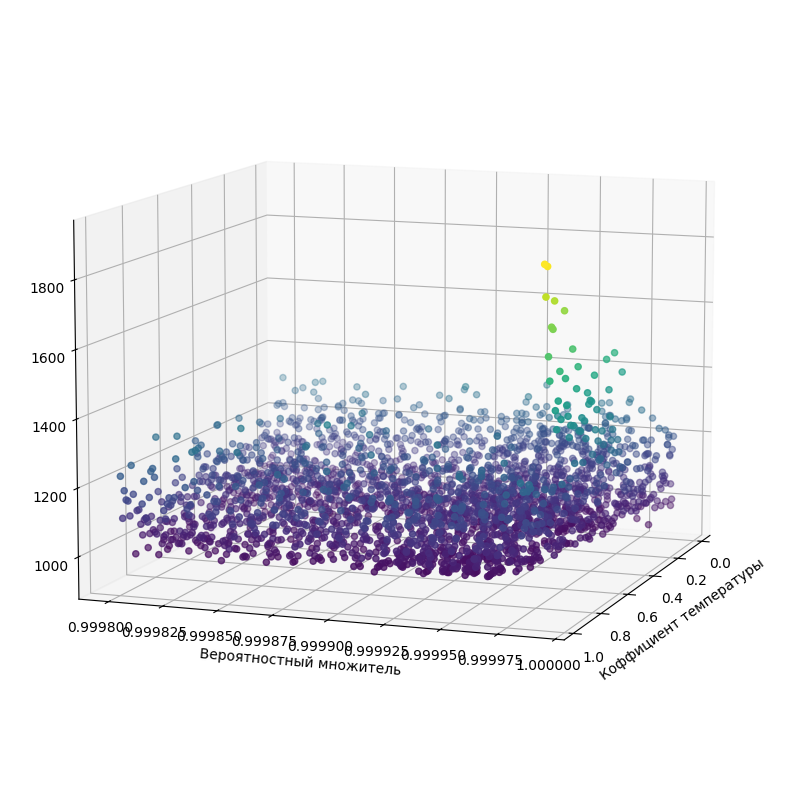

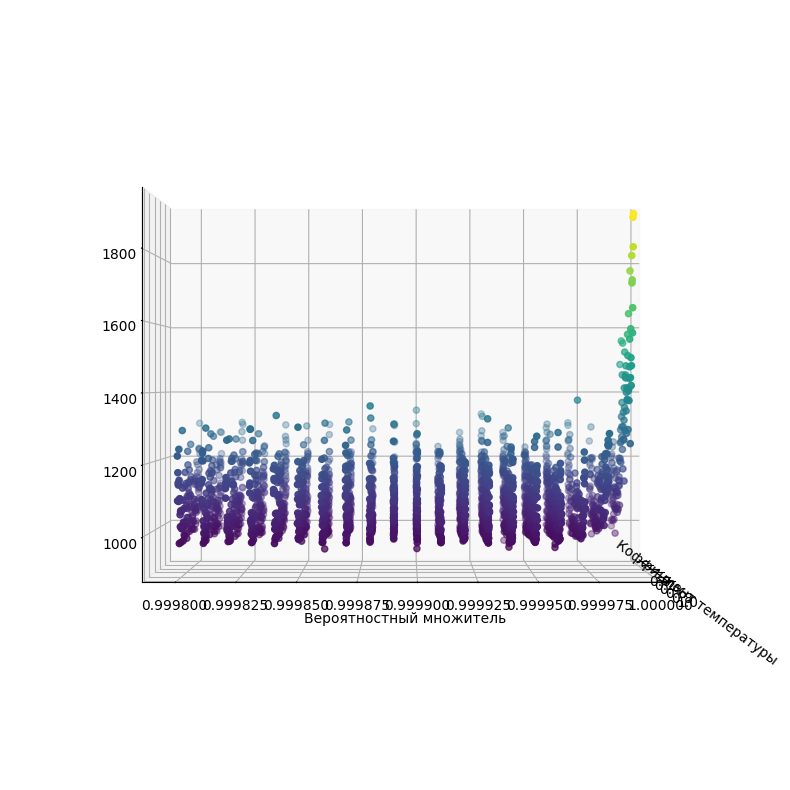

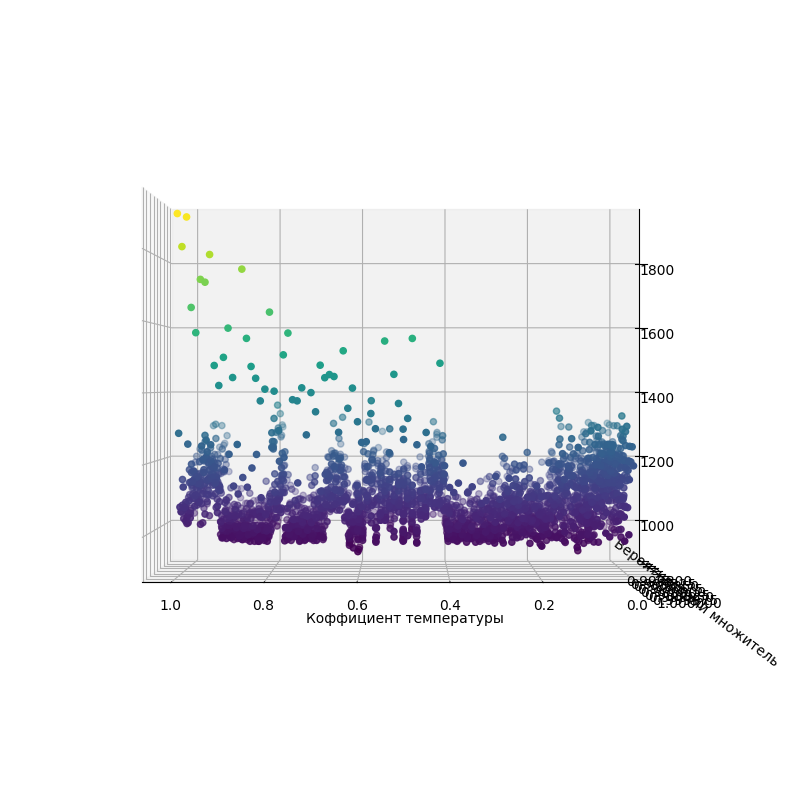

: 

In [14]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(prob_multipliers, alphas, best_losses, cmap='viridis', c=best_losses)
ax1.view_init(elev=10, azim=20)
ax1.set_xlabel("Коффициент температуры")
ax1.set_ylabel("Вероятностный множитель")
plt.show()

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(prob_multipliers, alphas, best_losses, cmap='viridis', c=best_losses)
ax1.view_init(elev=0, azim=0)
ax1.set_xlabel("Коффициент температуры")
ax1.set_ylabel("Вероятностный множитель")
plt.show()

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel("Коффициент температуры")
ax1.set_ylabel("Вероятностный множитель")
ax1.scatter(prob_multipliers, alphas, best_losses, cmap='viridis', c=best_losses)
ax1.view_init(elev=0, azim=90)
plt.show()


: 

: 

: 

---

---

---

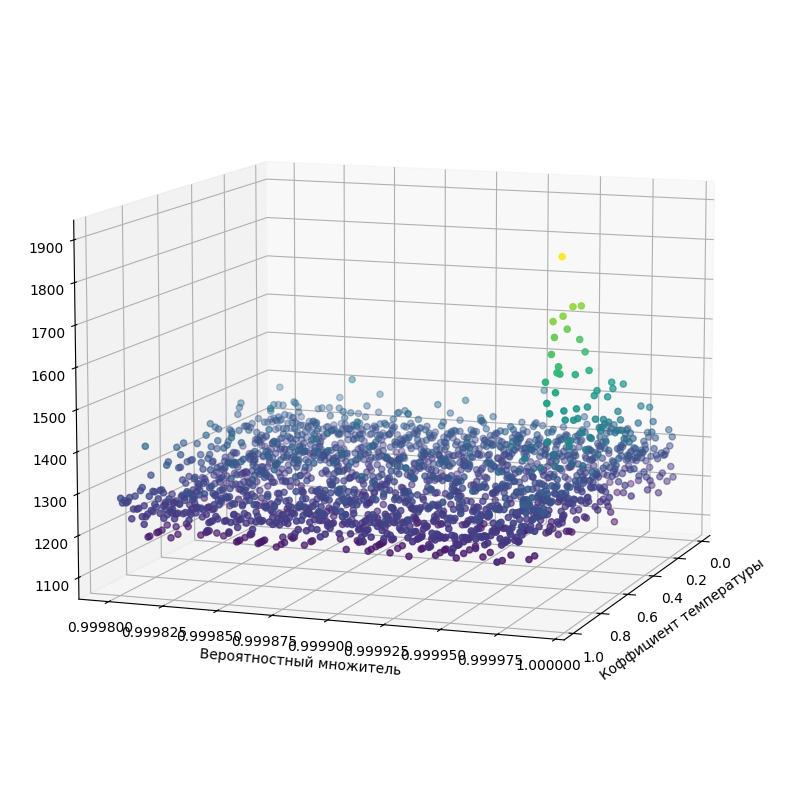

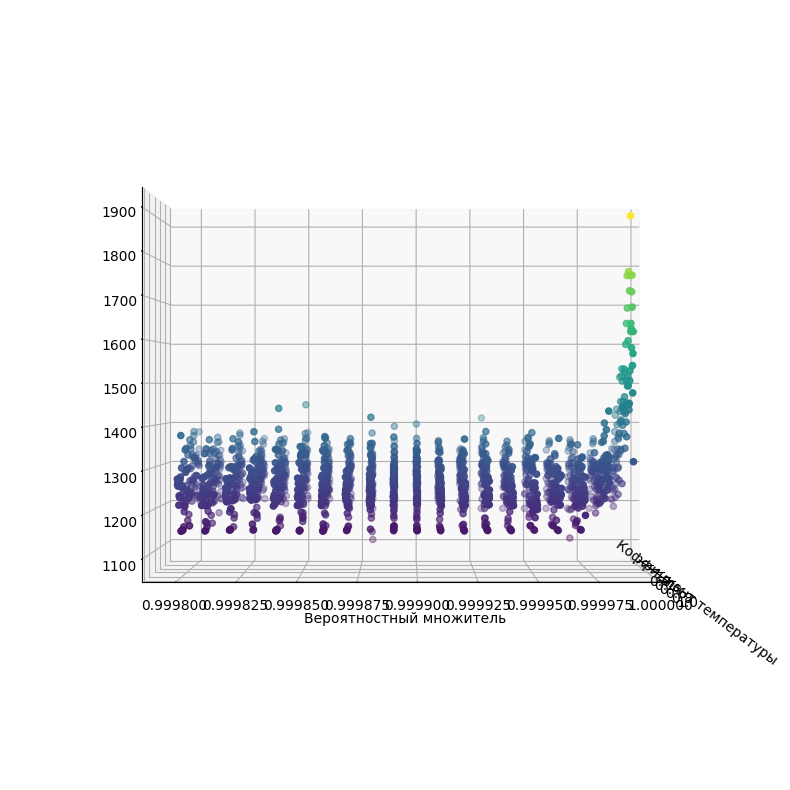

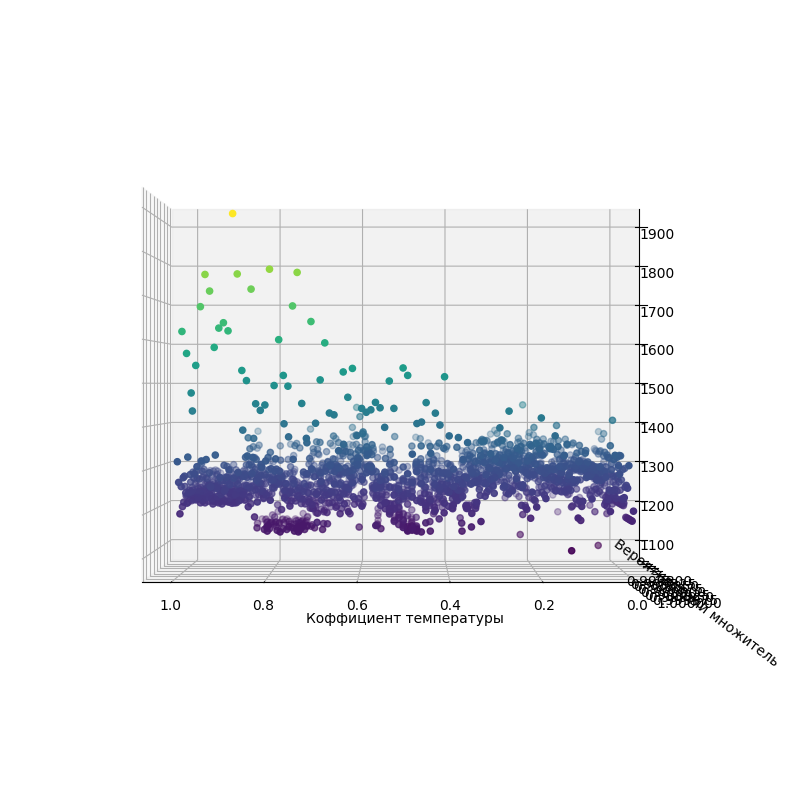

: 

In [56]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(prob_multipliers, alphas, best_losses, cmap='viridis', c=best_losses)
ax1.view_init(elev=10, azim=20)
ax1.set_xlabel("Коффициент температуры")
ax1.set_ylabel("Вероятностный множитель")
plt.show()

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(prob_multipliers, alphas, best_losses, cmap='viridis', c=best_losses)
ax1.view_init(elev=0, azim=0)
ax1.set_xlabel("Коффициент температуры")
ax1.set_ylabel("Вероятностный множитель")
plt.show()

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel("Коффициент температуры")
ax1.set_ylabel("Вероятностный множитель")
ax1.scatter(prob_multipliers, alphas, best_losses, cmap='viridis', c=best_losses)
ax1.view_init(elev=0, azim=90)
plt.show()


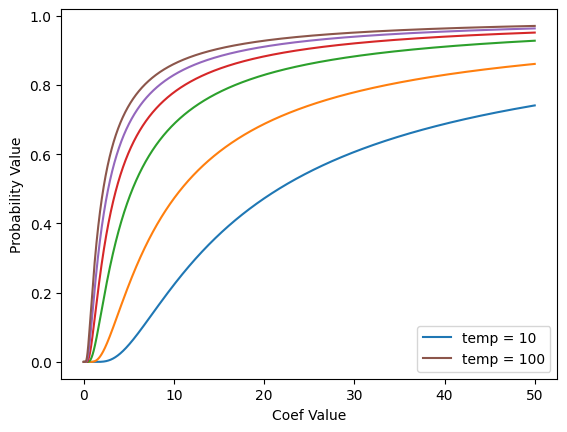

: 

In [14]:
xs = np.arange(0.001, 50, 0.001)
energy_delta = 150

temp = 10
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys, label="temp = 10")

temp = 20
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

temp = 40
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

temp = 60
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

temp = 80
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

temp = 100
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys, label="temp = 100")

plt.xlabel("Coef Value")
plt.ylabel("Probability Value")

plt.legend()

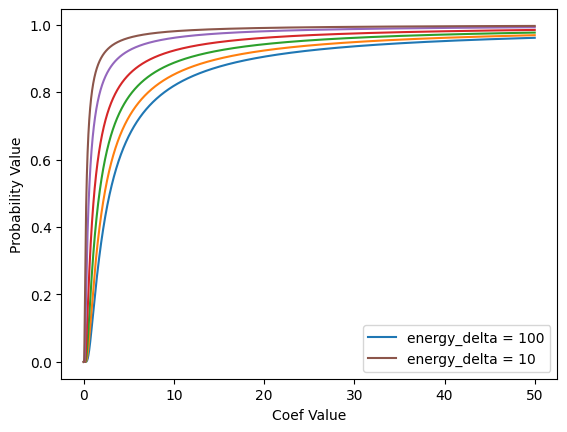

: 

In [15]:
xs = np.arange(0.001, 50, 0.001)
temp = 50

energy_delta = 100
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys, label="energy_delta = 100")

energy_delta = 80
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

energy_delta = 60
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

energy_delta = 40
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

energy_delta = 20
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys)

energy_delta = 10
ys = np.exp(-energy_delta / (xs * temp))
plt.plot(xs, ys, label="energy_delta = 10")

plt.xlabel("Coef Value")
plt.ylabel("Probability Value")

plt.legend()

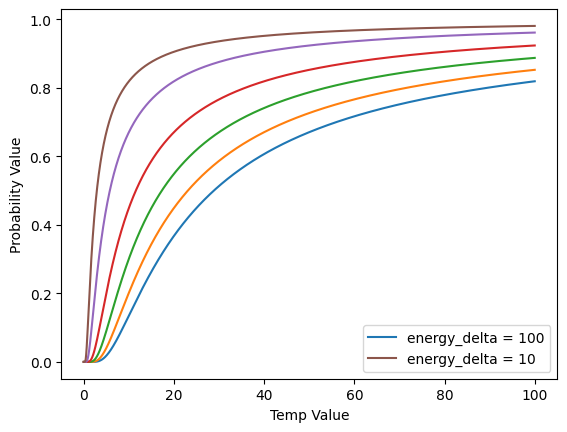

: 

In [ ]:
temp = np.arange(0.001, 100, 0.001)
coef = 5

energy_delta = 100
ys = np.exp(-energy_delta / (coef * temp))
plt.plot(temp, ys, label="energy_delta = 100")

energy_delta = 80
ys = np.exp(-energy_delta / (coef * temp))
plt.plot(temp, ys)

energy_delta = 60
ys = np.exp(-energy_delta / (coef * temp))
plt.plot(temp, ys)

energy_delta = 40
ys = np.exp(-energy_delta / (coef * temp))
plt.plot(temp, ys)

energy_delta = 20
ys = np.exp(-energy_delta / (coef * temp))
plt.plot(temp, ys)

energy_delta = 10
ys = np.exp(-energy_delta / (coef * temp))
plt.plot(temp, ys, label="energy_delta = 10")

plt.xlabel("Temp Value")
plt.ylabel("Probability Value")

plt.legend()

: 